# Descriptive analysis

The purpose of this notebook is to visualise the dataset and produce descriptive statistics. We can use the outputs from this for the final report.

In [344]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_rows', 500)

In [345]:
df = pd.read_csv("../data/datasets/dataset-for-overrun-analysis.csv")

In [346]:
df.columns

Index(['unique_id', 'project_subtype', 'project_subtype_two',
       'archive_filename', 'start_date', 'estimated_completion_date',
       'actual_completion_date', 'estimated_duration', 'actual_duration',
       'fiscal_year', 'estimated_cost', 'estimated_cost_nocontingency',
       'final_cost', 'cost_pct0', 'schedule_pct0', 'expenditure_pct0',
       'cost_pct10', 'schedule_pct10', 'expenditure_pct10', 'cost_pct20',
       'schedule_pct20', 'expenditure_pct20', 'cost_pct30', 'schedule_pct30',
       'expenditure_pct30', 'cost_pct40', 'schedule_pct40',
       'expenditure_pct40', 'cost_pct50', 'schedule_pct50',
       'expenditure_pct50', 'cost_pct60', 'schedule_pct60',
       'expenditure_pct60', 'cost_pct70', 'schedule_pct70',
       'expenditure_pct70', 'cost_pct80', 'schedule_pct80',
       'expenditure_pct80', 'cost_pct90', 'schedule_pct90',
       'expenditure_pct90'],
      dtype='object')

# 01: Plotting movements of cost, expenditure and schedule through project progression

## 01, 01: Seeing how the contract obligation moves over time

In [347]:
df2 = df.copy()

# Fill in NA values by propogating earlier values forward (ie, if pct20 and pct30 are NA, impute them with value from pct10 and so on)
df2 = df2[[f"expenditure_pct{i}" for i in range(0, 100, 10)]]
df2 = df2[~df2.expenditure_pct0.isna()]
df2 = df2.ffill(axis=1)

Text(0.5, 1.0, 'Change in normalised current contract obligation over time by project (1.0 = MAX obligation for given contract - not necessarily final)')

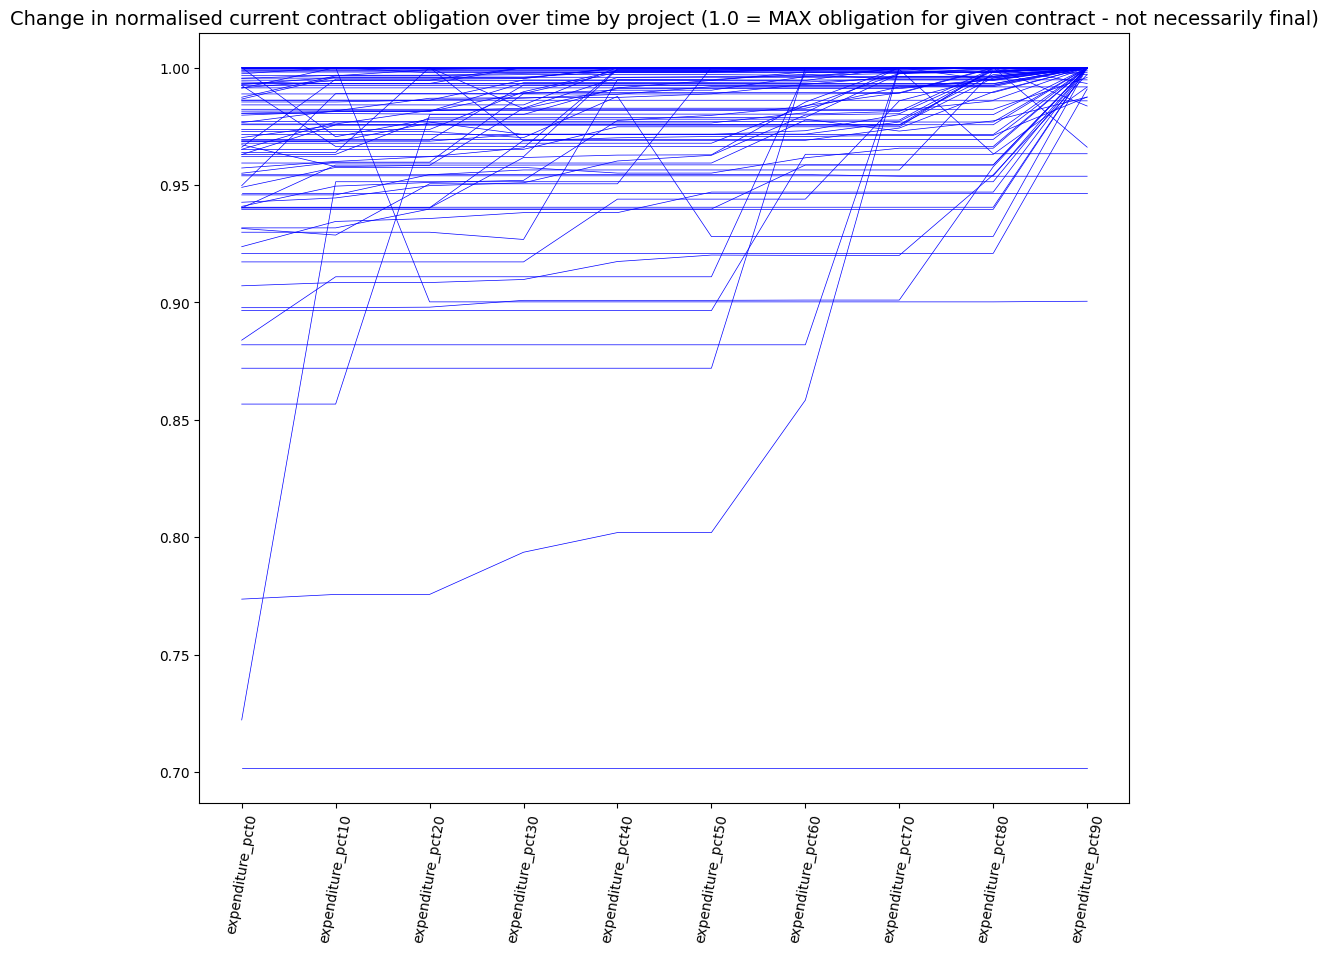

In [348]:
# Contract obligation over time. Many flat lines due to missing data. Many projects registered at early percentage stages, but with full contract obligation.
plt.figure(figsize=(12, 10))
plt.plot(df2.columns, df2.values.T, linestyle='-', color='b', linewidth=0.5)
plt.xticks(rotation=80)
plt.title("Change in normalised current contract obligation over time by project (1.0 = MAX obligation for given contract - not necessarily final)", size=14)

The graph shows the "current contract obligation" as a percentage on the y-axis, where 1 represents the highest current obligation the project reaches over its duration. The x-axis represents percentage of completion. The lines show individual projects' current contract obligation as it changes over the projects' lifetime.

In many cases, the amount starts at 1, indicating no change in contract obligation over the course of the project.

In some cases, the amount goes down, which indicates that the current obligation was previously over estimated?

There are many flat lines, due to missing data.

## 01, 02: Seeing how cost overrun changes over time

In [349]:
# Impute missing cost overrun values with previous values
df3 = df.copy()
df3 = df3[[f"cost_pct{i}" for i in range(0, 100, 10)]]
df3 = df3[~df3.cost_pct0.isna()].ffill(axis=1)

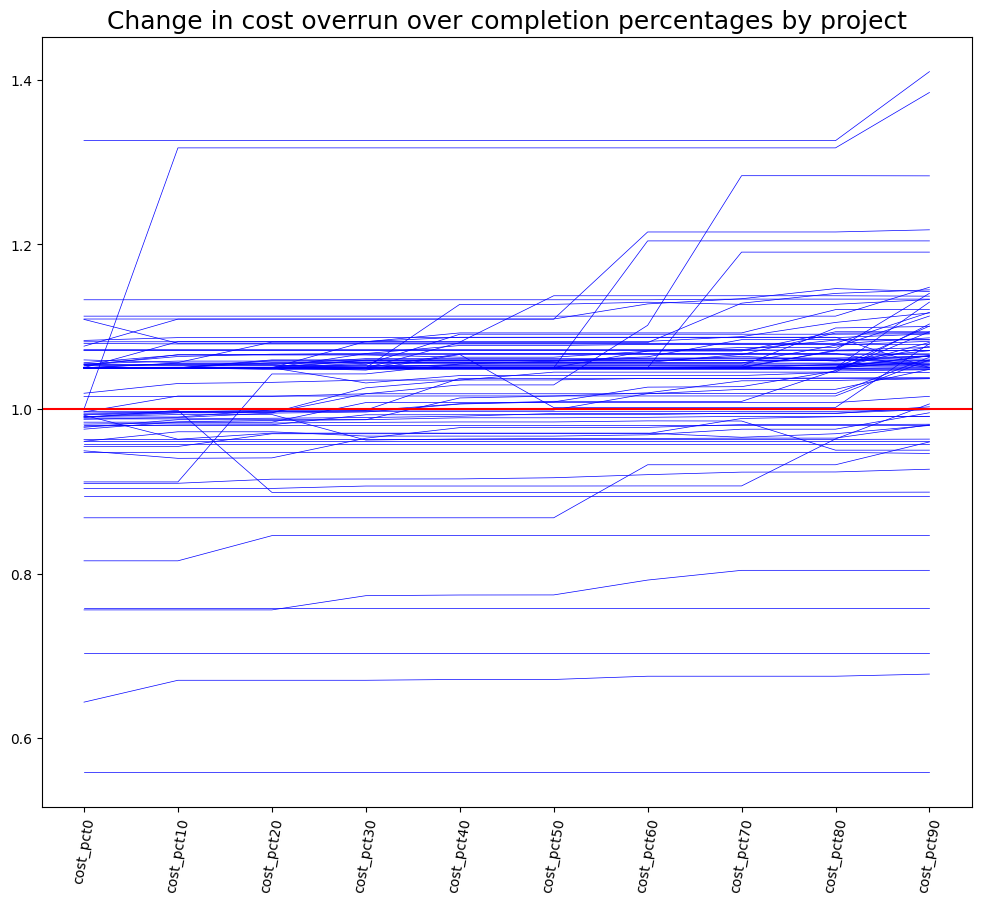

In [350]:
# Generally, cost overrun trends upwards as projects progress. There are some instances where it goes down again though. Again many flat lines from missing data.
plt.figure(figsize=(12, 10))
plt.plot(df3.columns, df3.values.T, linestyle='-', color='b', linewidth=0.5)
plt.axhline(y=1, color="r")
plt.xticks(rotation=80)
plt.title("Change in cost overrun over completion percentages by project", size=18)

plt.savefig("../plots/projectCostByStage.png")

## 01, 03: Seeing how schedule overrun estimates change over time

In [351]:
# Impute missing values for schedule overrun with previous values.
df4 = df.copy()
df4 = df4[[f"schedule_pct{i}" for i in range(0, 100, 10)]]
df4 = df4[~df4.schedule_pct0.isna()].ffill(axis=1)

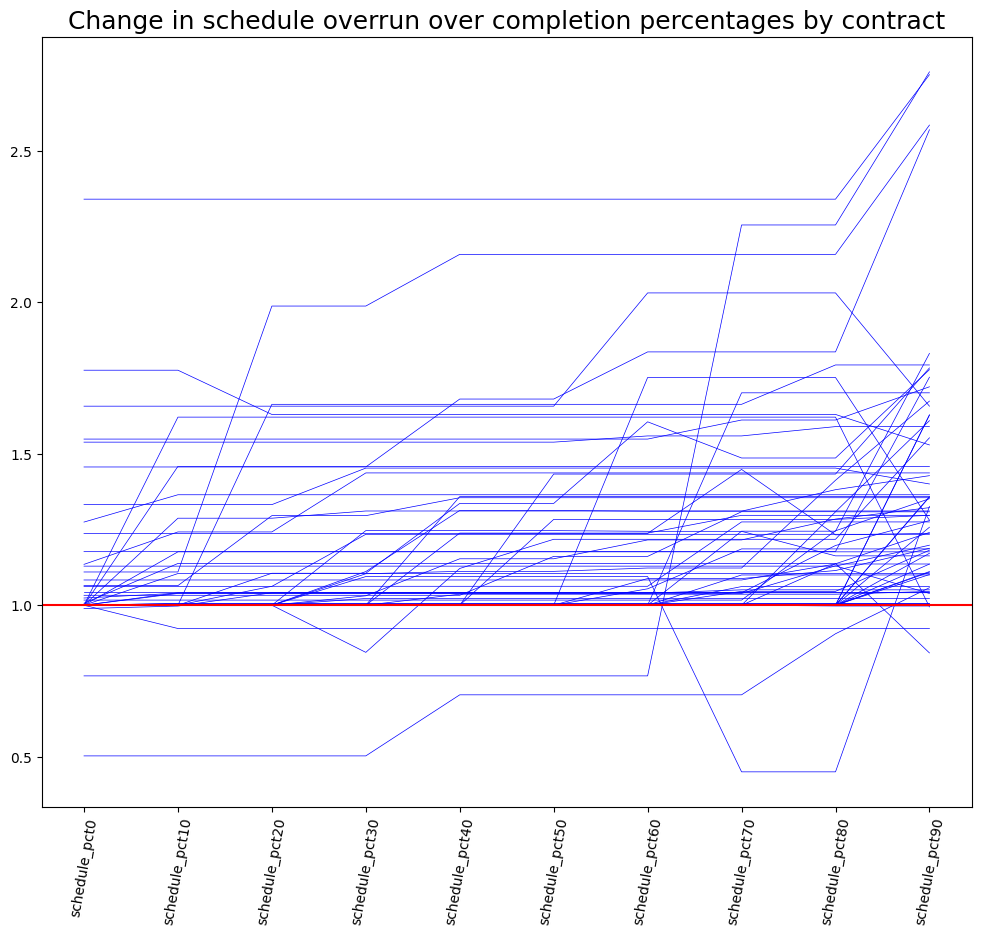

In [352]:
#Less schedule underruns than for cost. Can see where projects are diverging from 0% overrun - lots at pct0 and lots at pct80
plt.figure(figsize=(12, 10))
plt.plot(df4.columns, df4.values.T, linestyle='-', color='b', linewidth=0.5)
plt.axhline(y=1, color="r")
plt.xticks(rotation=80)
plt.title("Change in schedule overrun over completion percentages by contract", size=18)

plt.savefig("../plots/projectScheduleByStage.png")

## Grab some projects where we have decreases in cost/schedule overrun

In [353]:
df[df.cost_pct90 < df.cost_pct80].loc[288, "unique_id"]

'1094_electrical distribution system'

In [354]:
# Grab a project where schedule overrun decreases

df[df.schedule_pct70 < 0.5].unique_id

1176    XDAT083003_dormitory (144 rm)
Name: unique_id, dtype: object

In [355]:
# Load expanded dataset
expanded_dataset = pd.read_excel("../data/datasets/unique-contracts-coded.xlsx")

In [356]:
print(expanded_dataset[expanded_dataset.unique_id == '1094_electrical distribution system'][[
    'archive_filename',
    'Submission Date', 
    'Data as of Date', 
    'Project Number',
    'Start Date',
    'Estimated Cost',
    'Actual Cost',
    'Estimated Cost (exc. contingency)',
    'Completion Percentage'
]].sort_values(by="Completion Percentage", ascending=True).reset_index(drop=True).to_markdown(index=False))

| archive_filename                             | Submission Date   | Data as of Date   |   Project Number | Start Date   |   Estimated Cost |   Actual Cost |   Estimated Cost (exc. contingency) |   Completion Percentage |
|:---------------------------------------------|:------------------|:------------------|-----------------:|:-------------|-----------------:|--------------:|------------------------------------:|------------------------:|
| MilCon Status Report - January, 2013.xlsx    | 2013-02-15        | nan               |             1094 | 2010-10-12   |       7.3986e+07 |    6.076e+07  |                         7.04629e+07 |                0.64     |
| MilCon Status Report - March, 2013.xlsx      | 2013-04-15        | nan               |             1094 | 2010-10-12   |       7.3986e+07 |    6.5966e+07 |                         7.04629e+07 |                0.64     |
| MilCon Status Report - May, 2013.xlsx        | 2013-06-12        | 2013-05-31        |             1094 | 2010

In [357]:
print(expanded_dataset[expanded_dataset.unique_id == "XDAT083003_dormitory (144 rm)"][[
    'archive_filename',
    'Submission Date', 
    'Data as of Date', 
    'Project Number',
    'Start Date',
    'Placed in Service Date', 
    'Estimated Construction Completion Date',
    'Actual Construction Completion Date', 
    'Completion Percentage'
]].sort_values(by="Completion Percentage", ascending=True).reset_index(drop=True).to_markdown(index=False))

| archive_filename                            | Submission Date   | Data as of Date   | Project Number   | Start Date   | Placed in Service Date   | Estimated Construction Completion Date   | Actual Construction Completion Date   |   Completion Percentage |
|:--------------------------------------------|:------------------|:------------------|:-----------------|:-------------|:-------------------------|:-----------------------------------------|:--------------------------------------|------------------------:|
| MilCon Status Report - January, 2013.xlsx   | 2013-02-15        | nan               | XDAT083003       | 2012-06-11   | 2013-11-04               | 2013-11-11                               | 2013-11-11                            |                    0.04 |
| MilCon Status Report - March, 2013.xlsx     | 2013-04-15        | nan               | XDAT083003       | 2012-06-11   | 2013-11-04               | 2013-11-11                               | 2013-11-11                        

# 02: Visualise cost and schedule distributions

## 02, 01: Actual cost and schedule

In [358]:
df.final_cost.describe() # Variation in costs - contracts go from about 1k to 50b dollars

count    1.188000e+03
mean     1.882445e+08
std      2.297137e+09
min      1.498000e+03
25%      5.730750e+06
50%      1.276517e+07
75%      2.660125e+07
max      5.084741e+10
Name: final_cost, dtype: float64

/var/folders/z7/sh9lp16n1f997dpqzbly6cfh0000gp/T/ipykernel_2341/790057583.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.final_cost, ax=axes[0, 0], hist=True, kde=True)
/var/folders/z7/sh9lp16n1f997dpqzbly6cfh0000gp/T/ipykernel_2341/790057583.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.di

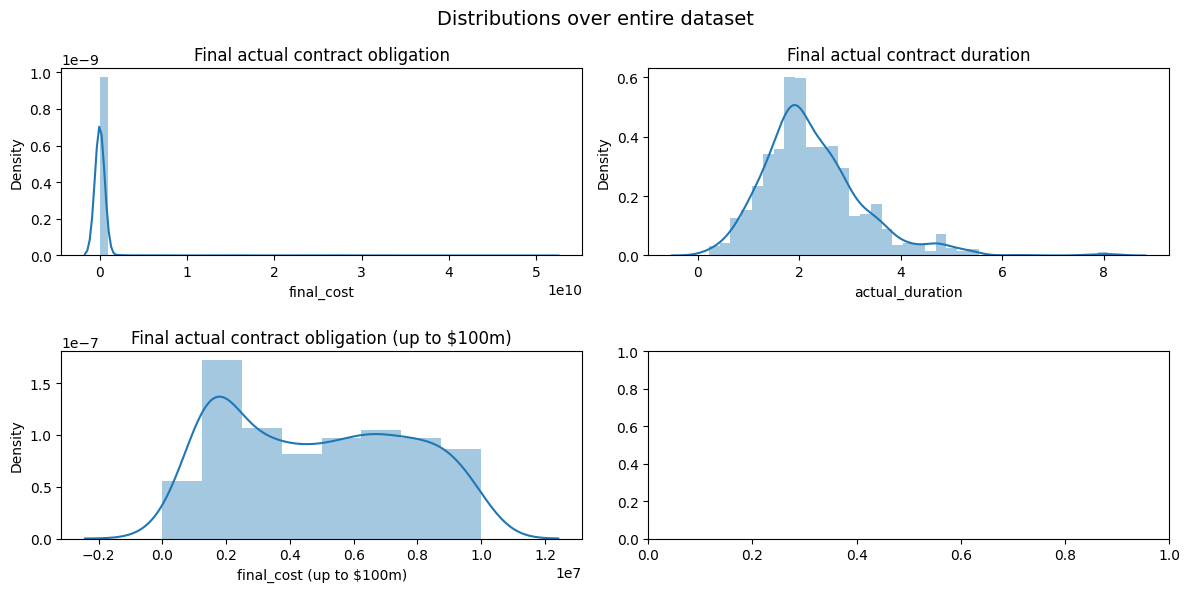

In [382]:
fig, axes = plt.subplots(2, 2, figsize=(12, 6))
sns.distplot(df.final_cost, ax=axes[0, 0], hist=True, kde=True)
sns.distplot(df[df.final_cost<1e+7].final_cost, ax=axes[1, 0], hist=True, kde=True)
sns.distplot(df[~df.actual_duration.isna()].actual_duration.apply(lambda x: int(x[:-5])).div(365), ax = axes[0, 1], hist=True, kde=True)
fig.suptitle("Distributions over entire dataset", size=14)
axes[0, 0].set_title("Final actual contract obligation")
axes[0, 1].set_title("Final actual contract duration")
axes[1, 0].set_title("Final actual contract obligation (up to $100m)")
axes[1, 0].set_xlabel("final_cost (up to $100m)")
fig.tight_layout()

fig.savefig("../plots/actualsHists.png")

/var/folders/z7/sh9lp16n1f997dpqzbly6cfh0000gp/T/ipykernel_2341/2973475577.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df5[df5.project_subtype == category].final_cost, hist=True, kde=True, ax=axes[i, 0])
/var/folders/z7/sh9lp16n1f997dpqzbly6cfh0000gp/T/ipykernel_2341/2973475577.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de4414

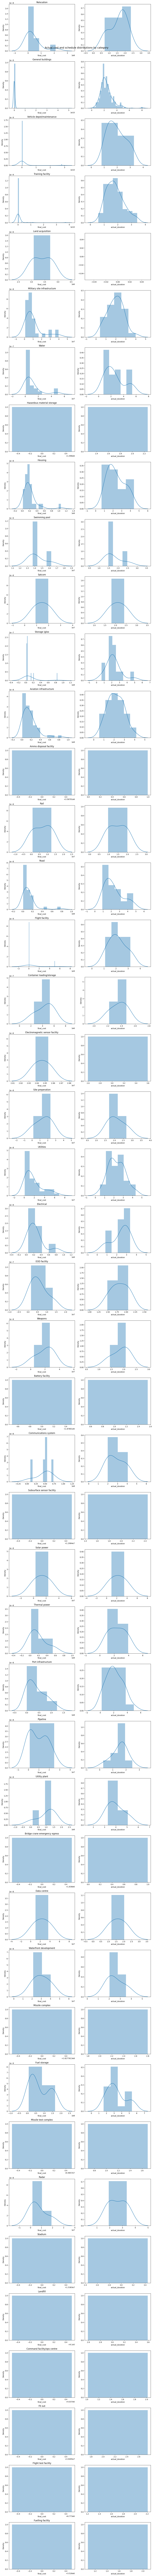

In [360]:

df5 = df.copy()
df5 = df5[~df5.project_subtype.isna()]
fig, axes = plt.subplots(nrows = df5.project_subtype.nunique(), ncols = 2, figsize=(12, 200))
for i, category in enumerate(df5.project_subtype.unique()):
    sns.distplot(df5[df5.project_subtype == category].final_cost, hist=True, kde=True, ax=axes[i, 0])
    sns.distplot(df5[(df5.project_subtype == category)&(~df5.actual_duration.isna())].actual_duration.apply(lambda x: int(x[:-5])).div(365), hist=True, kde=True, ax=axes[i, 1])
    axes[i, 0].set_title(category)
fig.suptitle("Actual cost and schedule distributions by category", size=14)
plt.tight_layout()

## 02, 02: Cost and schedule overrun

/var/folders/z7/sh9lp16n1f997dpqzbly6cfh0000gp/T/ipykernel_2341/2347925432.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.cost_pct90, hist=False, kde=True, ax=axes[0])
/var/folders/z7/sh9lp16n1f997dpqzbly6cfh0000gp/T/ipykernel_2341/2347925432.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad637275

Text(0.5, 0.98, 'Cost and schedule overrun distributions across whole data set (where completion % is between 90 - 100)')

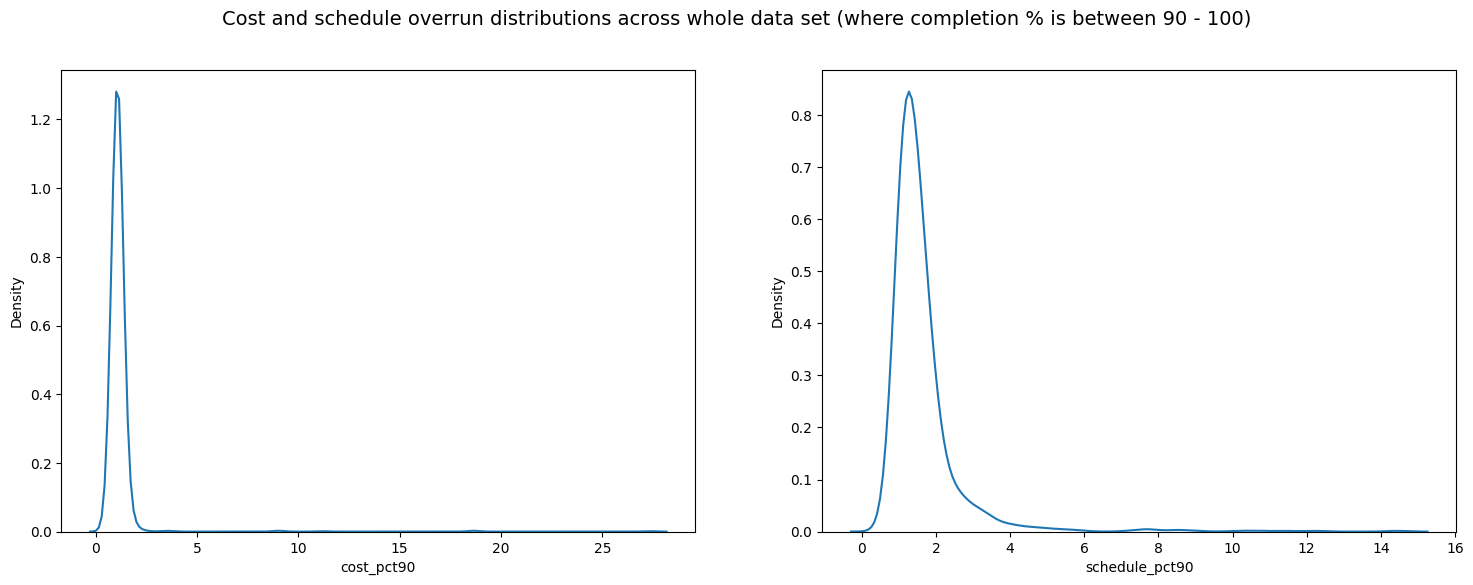

In [361]:
# Do histogram of overrun by category!
# https://towardsdatascience.com/histograms-and-density-plots-in-python-f6bda88f5ac0?gi=a873e4d4b9db

fig, axes = plt.subplots(1, 2, figsize=(18, 6))
sns.distplot(df.cost_pct90, hist=False, kde=True, ax=axes[0])
sns.distplot(df.schedule_pct90, hist=False, kde=True, ax=axes[1])
fig.suptitle("Cost and schedule overrun distributions across whole data set (where completion % is between 90 - 100)", size=14)

/var/folders/z7/sh9lp16n1f997dpqzbly6cfh0000gp/T/ipykernel_2341/3136351087.py:16: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(subset_cost.cost_pct90, hist=False, kde=True, kde_kws={'shade':True, 'linewidth':3}, label = project_type, ax=axes[0])
/Users/Tom/.pyenv/versions/dio/lib/python3.12/site-packages/seaborn/distributions.py:2496: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)
/var/folders/z7/sh9lp16n1f997dpqzbly6cfh0000gp/T/ipykernel_2341/3136351087.py:17: UserW

Text(0.5, 0.98, 'Overrun distribution by category (for categroies with minimum 50 observations)')

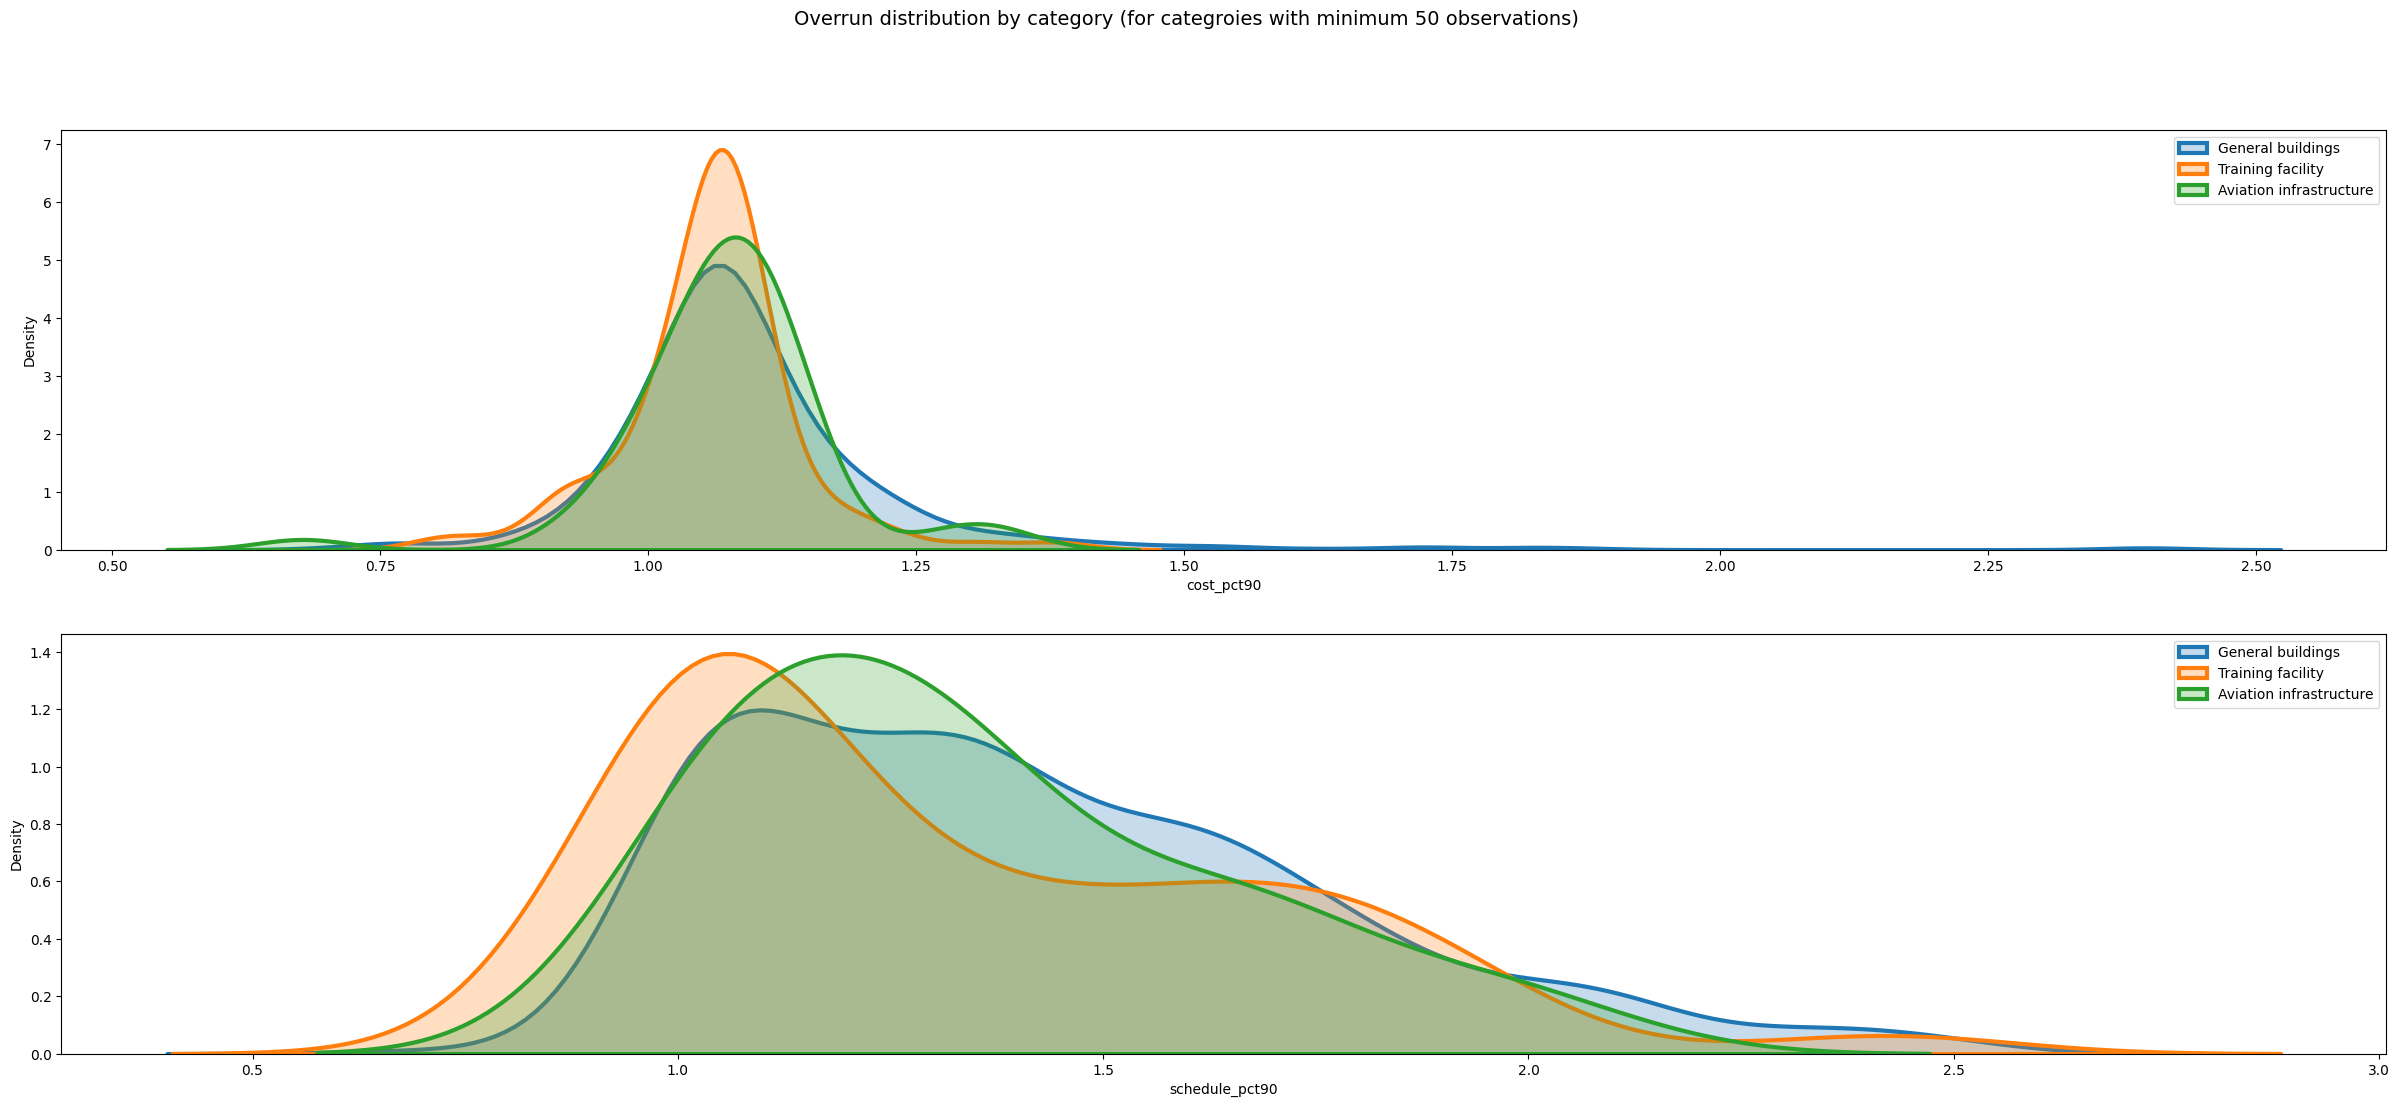

In [362]:
# Plot individual asset classes

fig, axes = plt.subplots(2, 1, figsize = (30, 12))

for project_type in df5.project_subtype.unique():

    subset = df5[df5.project_subtype == project_type]
    
    # Limit to where we have at least 100 contracts
    if subset.shape[0] > 50:

        # Limit to between 0 and 2.5 overrun ratio so it is more visible
        subset_cost = subset[subset.cost_pct90 < 2.5]
        subset_schedule = subset[subset.schedule_pct90 < 2.5]

        sns.distplot(subset_cost.cost_pct90, hist=False, kde=True, kde_kws={'shade':True, 'linewidth':3}, label = project_type, ax=axes[0])
        sns.distplot(subset_schedule.schedule_pct90, hist=False, kde=True, kde_kws={'shade':True, 'linewidth':3}, label = project_type, ax=axes[1])

axes[0].legend()
axes[1].legend()
fig.suptitle("Overrun distribution by category (for categroies with minimum 50 observations)", size=14)


/var/folders/z7/sh9lp16n1f997dpqzbly6cfh0000gp/T/ipykernel_2341/1328517735.py:16: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(subset_cost.cost_pct90, hist=False, kde=True, kde_kws={'shade':True, 'linewidth':3}, label = project_type, ax=axes[0])
/Users/Tom/.pyenv/versions/dio/lib/python3.12/site-packages/seaborn/distributions.py:2496: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)
/var/folders/z7/sh9lp16n1f997dpqzbly6cfh0000gp/T/ipykernel_2341/1328517735.py:17: UserW

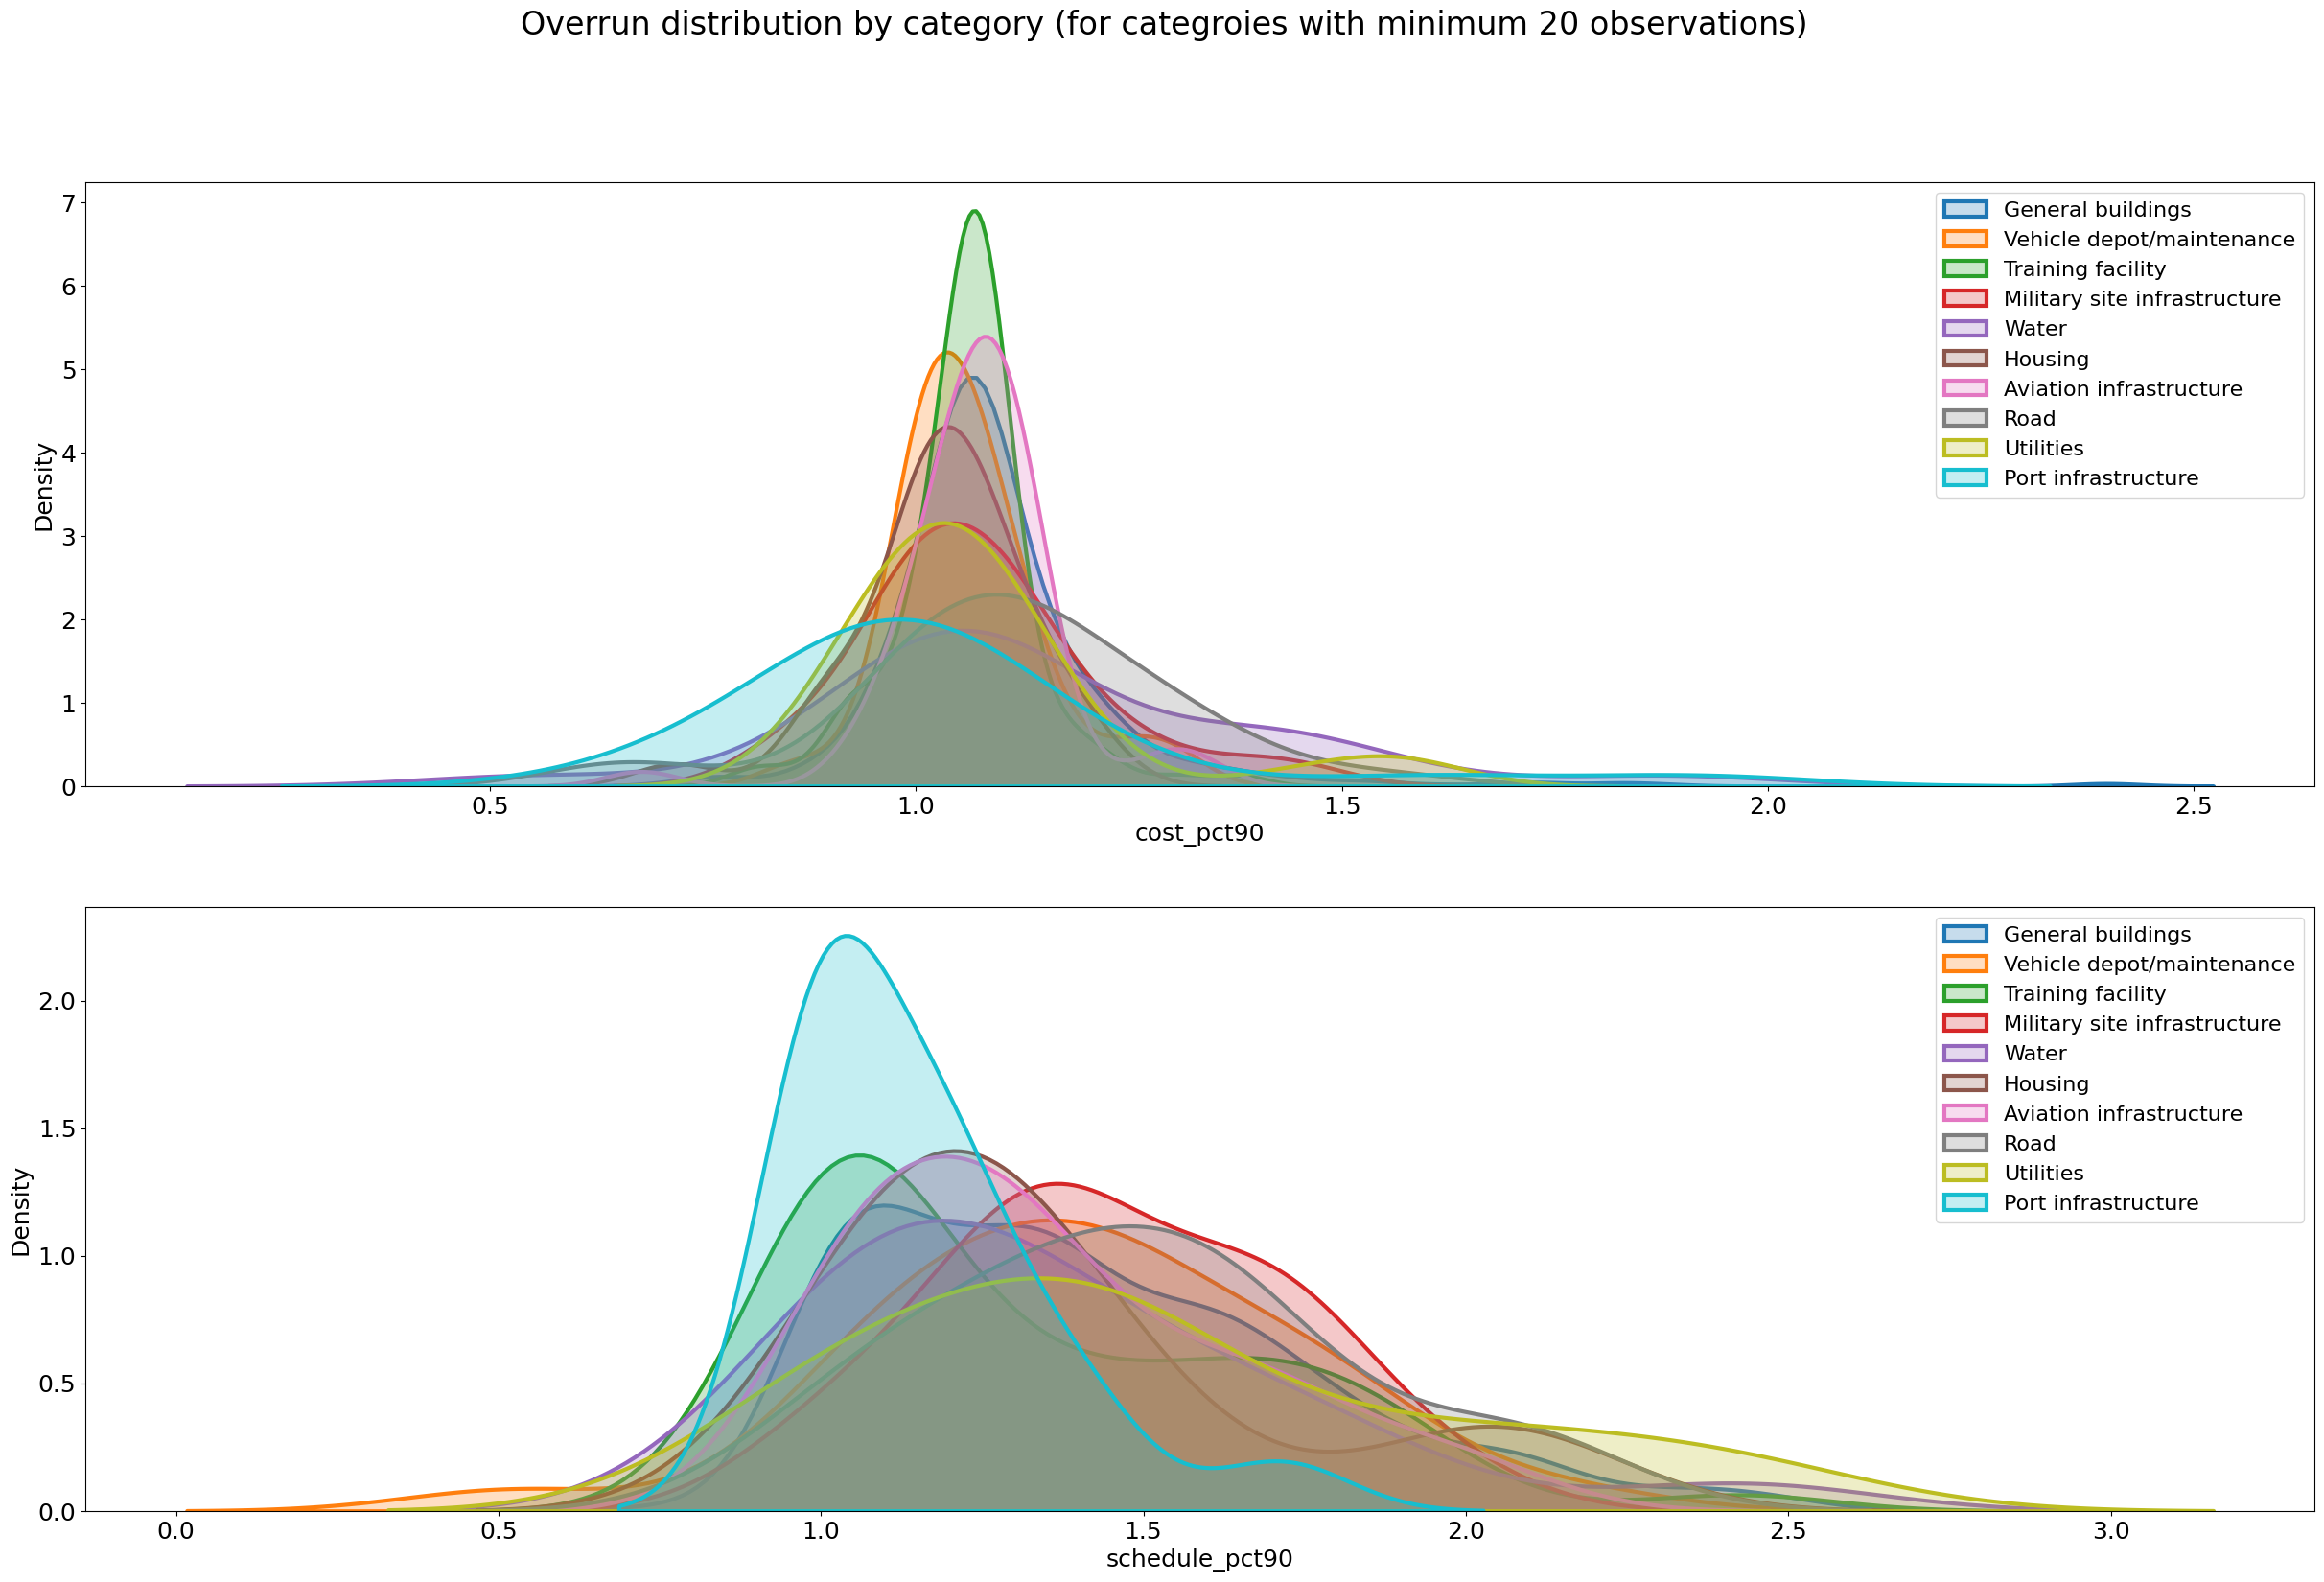

In [363]:
# Plot individual asset classes

fig, axes = plt.subplots(2, 1, figsize = (30, 18))

for project_type in df5.project_subtype.unique():

    subset = df5[df5.project_subtype == project_type]
    
    # Limit to where we have at least 100 contracts
    if subset.shape[0] > 20:

        # Limit to between 0 and 2.5 overrun ratio so it is more visible
        subset_cost = subset[subset.cost_pct90 < 2.5]
        subset_schedule = subset[subset.schedule_pct90 < 2.5]

        sns.distplot(subset_cost.cost_pct90, hist=False, kde=True, kde_kws={'shade':True, 'linewidth':3}, label = project_type, ax=axes[0])
        sns.distplot(subset_schedule.schedule_pct90, hist=False, kde=True, kde_kws={'shade':True, 'linewidth':3}, label = project_type, ax=axes[1])

axes[0].legend()
axes[1].legend()

axes[0].tick_params(axis='both', which='major', labelsize=18)
axes[1].tick_params(axis='both', which='major', labelsize=18)

axes[0].set_xlabel("cost_pct90", fontsize=18)
axes[0].set_ylabel("Density", fontsize=18)

axes[1].set_xlabel("schedule_pct90", fontsize=18)
axes[1].set_ylabel("Density", fontsize=18)

axes[0].legend(prop={'size': 16})
axes[1].legend(prop={'size': 16})

fig.suptitle("Overrun distribution by category (for categroies with minimum 20 observations)", size=24)

fig.savefig("../plots/overrunsDensity.png")


# 03: Get counts by taxonomy

In [364]:
## Get counts for overall categories
print(df.groupby('project_subtype').agg({'cost_pct90' : 'count', 'schedule_pct90': 'count'}).to_markdown())

#df.groupby('project_subtype').agg({'cost_pct90' : 'count', 'schedule_pct90': 'count'}).reset_index()

| project_subtype                 |   cost_pct90 |   schedule_pct90 |
|:--------------------------------|-------------:|-----------------:|
| Ammo disposal facility          |            1 |                1 |
| Aviation infrastructure         |           54 |               44 |
| Battery facility                |            1 |                1 |
| Bridge crane emergency egress   |            1 |                1 |
| Command facility/ops centre     |            1 |                1 |
| Communications system           |            5 |                4 |
| Container loading/storage       |            3 |                2 |
| Data centre                     |            2 |                2 |
| EOD facility                    |            5 |                4 |
| Electrical                      |            9 |                9 |
| Electromagnetic sensor facility |            2 |                1 |
| Fit out                         |            1 |                1 |
| Flight facility   

In [365]:
## Get counts for subcategories
print(df.groupby(['project_subtype', 'project_subtype_two']).agg({'cost_pct90': 'count', 'schedule_pct90': 'count'}).to_markdown())

#df.groupby(['project_subtype', 'project_subtype_two']).agg({'cost_pct90': 'count', 'schedule_pct90': 'count'})

|                                                                     |   cost_pct90 |   schedule_pct90 |
|:--------------------------------------------------------------------|-------------:|-----------------:|
| ('Aviation infrastructure', 'Aeriel port facility')                 |            2 |                2 |
| ('Aviation infrastructure', 'Apron')                                |           23 |               19 |
| ('Aviation infrastructure', 'Apron lighting')                       |            1 |                1 |
| ('Aviation infrastructure', 'Flight control tower')                 |            6 |                5 |
| ('Aviation infrastructure', 'Oiling & fuelling')                    |           13 |               12 |
| ('Aviation infrastructure', 'Runway')                               |            5 |                1 |
| ('Aviation infrastructure', 'Taxiway')                              |            3 |                3 |
| ('Electrical', 'Electricity sub-station')   

# 04: Get counts by percentage complete

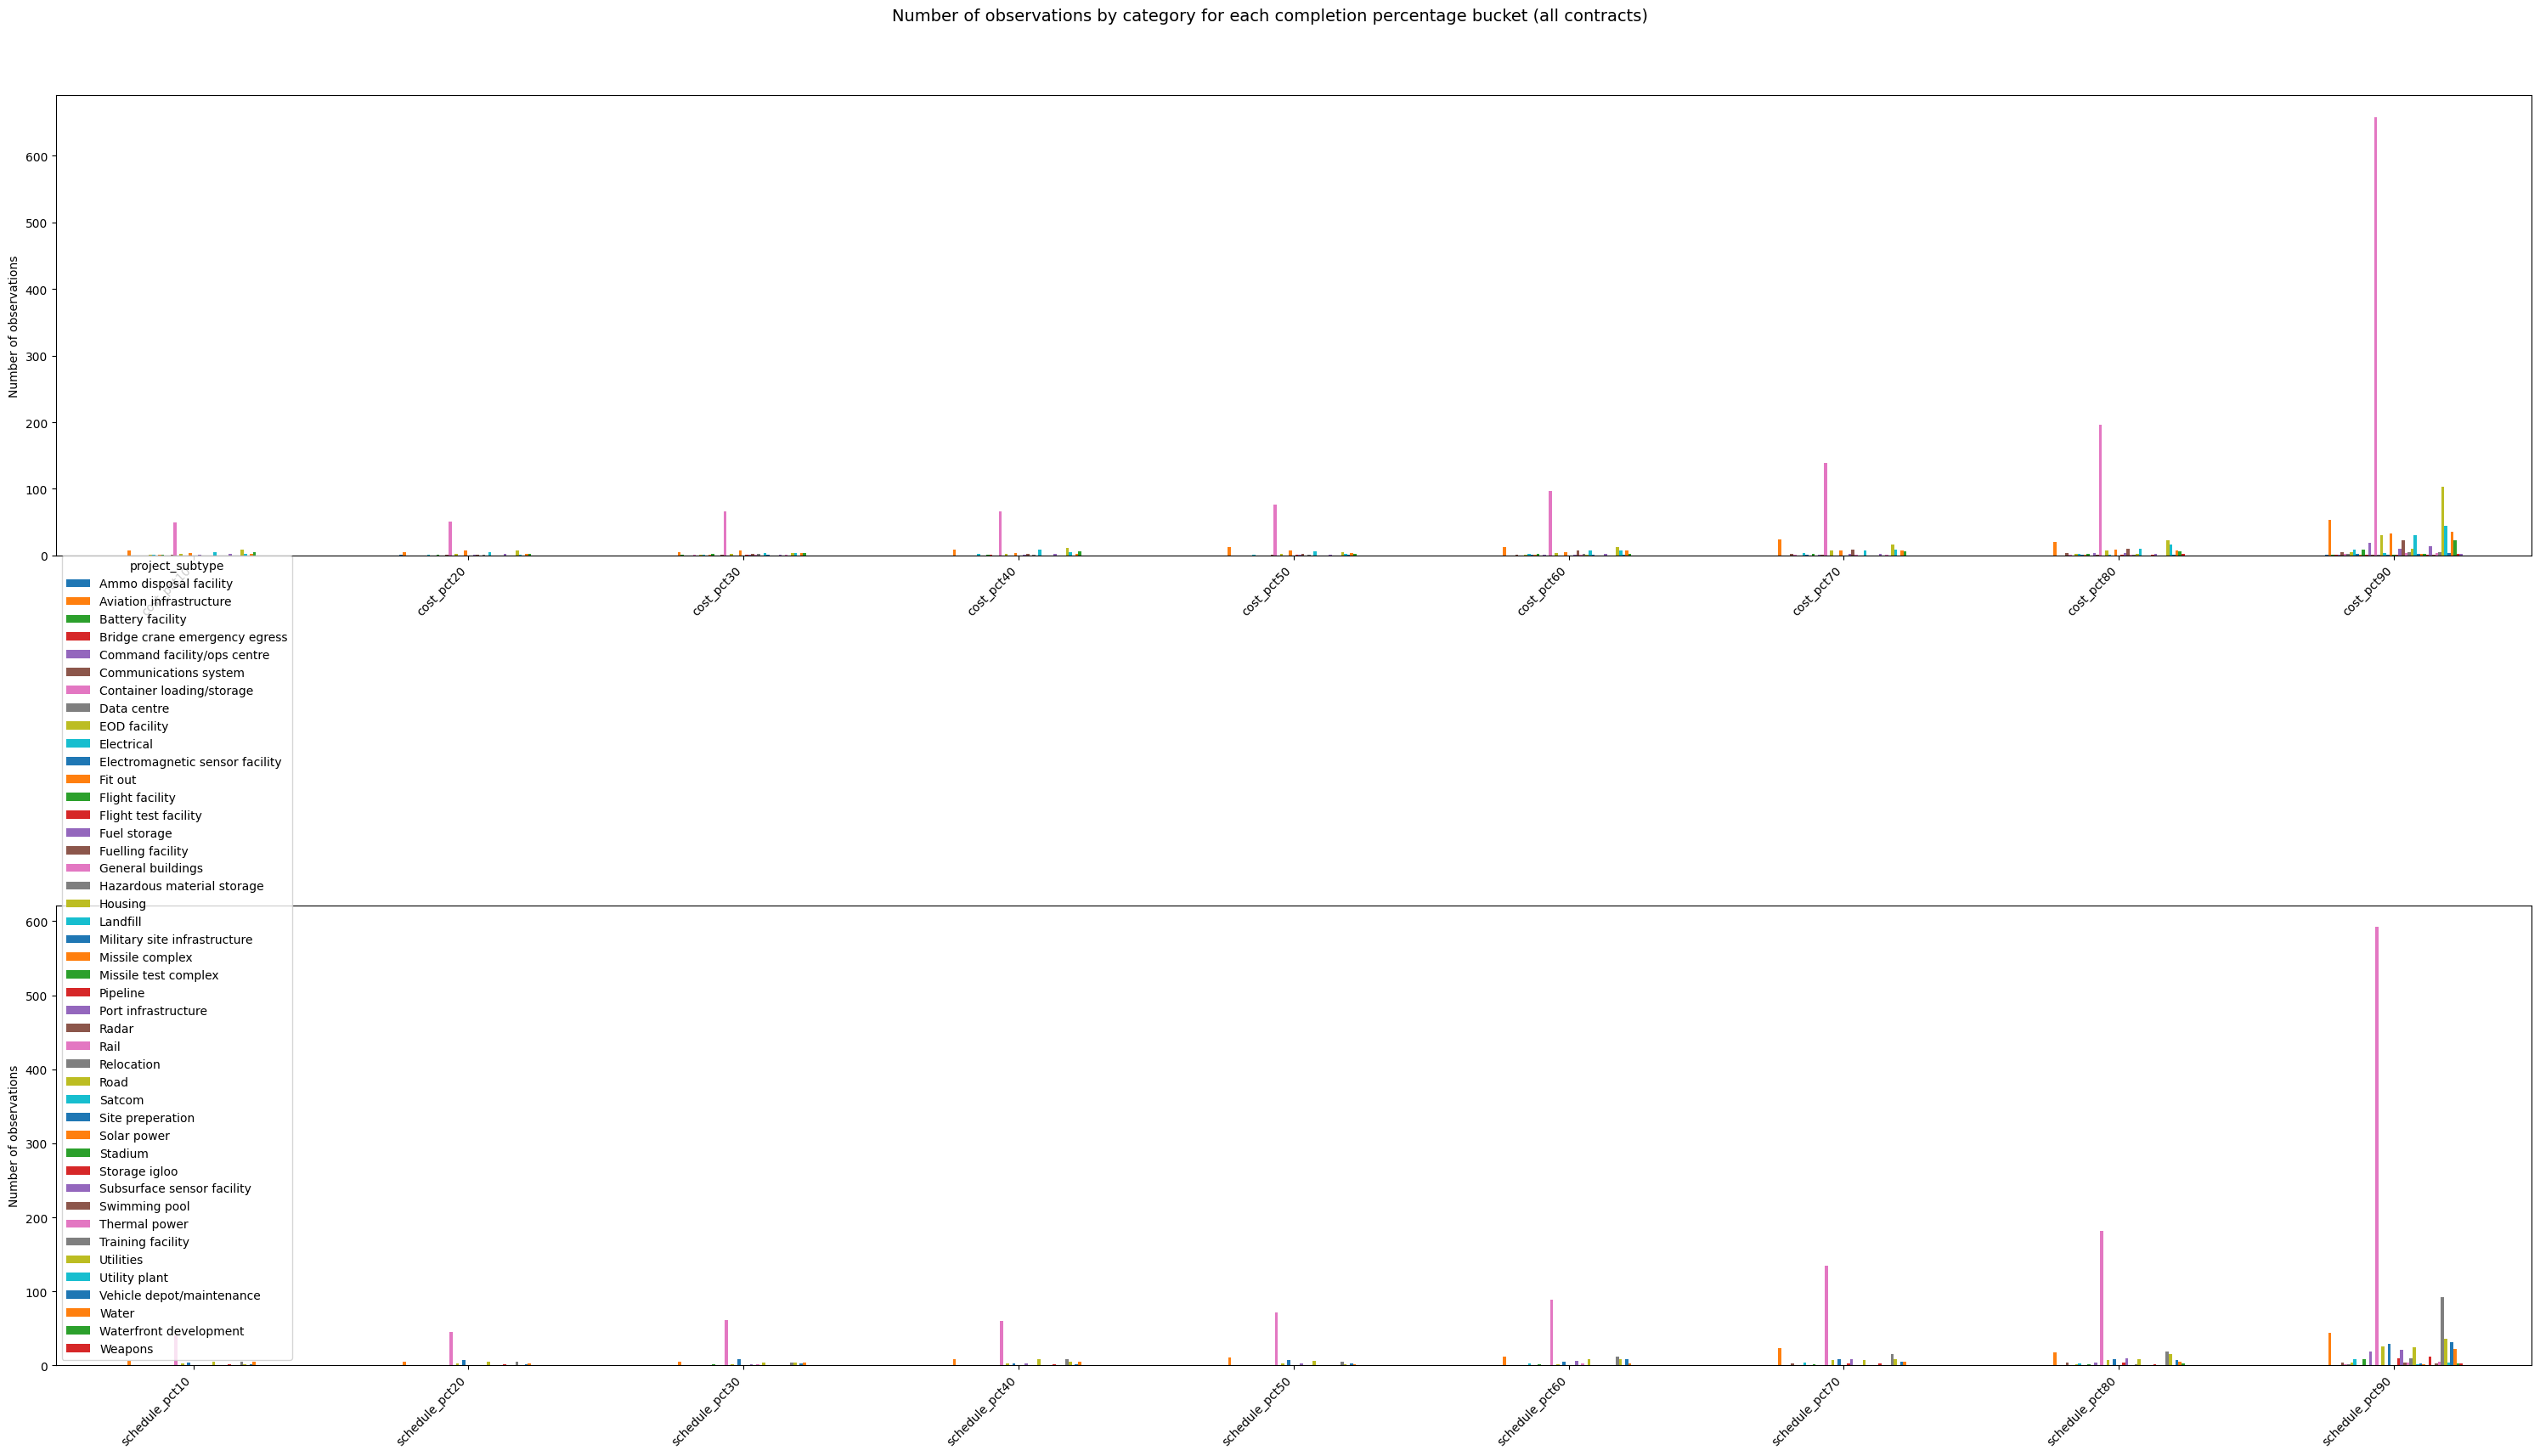

In [366]:
# Barchart for cost/schedule counts at different percent complete
count_cost = df.melt(id_vars='project_subtype', value_vars=[f'cost_pct{i}' for i in range(10, 100, 10)]).dropna().groupby(['variable', 'project_subtype']).size().unstack(fill_value=0)
count_schedule = df.melt(id_vars='project_subtype', value_vars=[f'schedule_pct{i}' for i in range(10, 100, 10)]).dropna().groupby(['variable', 'project_subtype']).size().unstack(fill_value=0)

fig, axes = plt.subplots(2, 1, figsize = (30, 18))

count_cost.plot(kind='bar', stacked=False, ax=axes[0])
count_schedule.plot(kind='bar', stacked=False, ax=axes[1])

axes[0].set_xticklabels(count_cost.index, rotation=45, ha="right")
axes[1].set_xticklabels(count_schedule.index, rotation=45, ha="right")

axes[0].set_xlabel("")
axes[1].set_xlabel("")

axes[0].set_ylabel("Number of observations")
axes[1].set_ylabel("Number of observations")

axes[0].get_legend().remove()

fig.suptitle("Number of observations by category for each completion percentage bucket (all contracts)", size=14)
fig.tight_layout(rect=[0, 0.03, 1, 0.95])



/var/folders/z7/sh9lp16n1f997dpqzbly6cfh0000gp/T/ipykernel_2341/3057484275.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_yticklabels(range(0, 700, 100), size=22)
/var/folders/z7/sh9lp16n1f997dpqzbly6cfh0000gp/T/ipykernel_2341/3057484275.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_yticklabels(range(0, 700, 100), size=22)


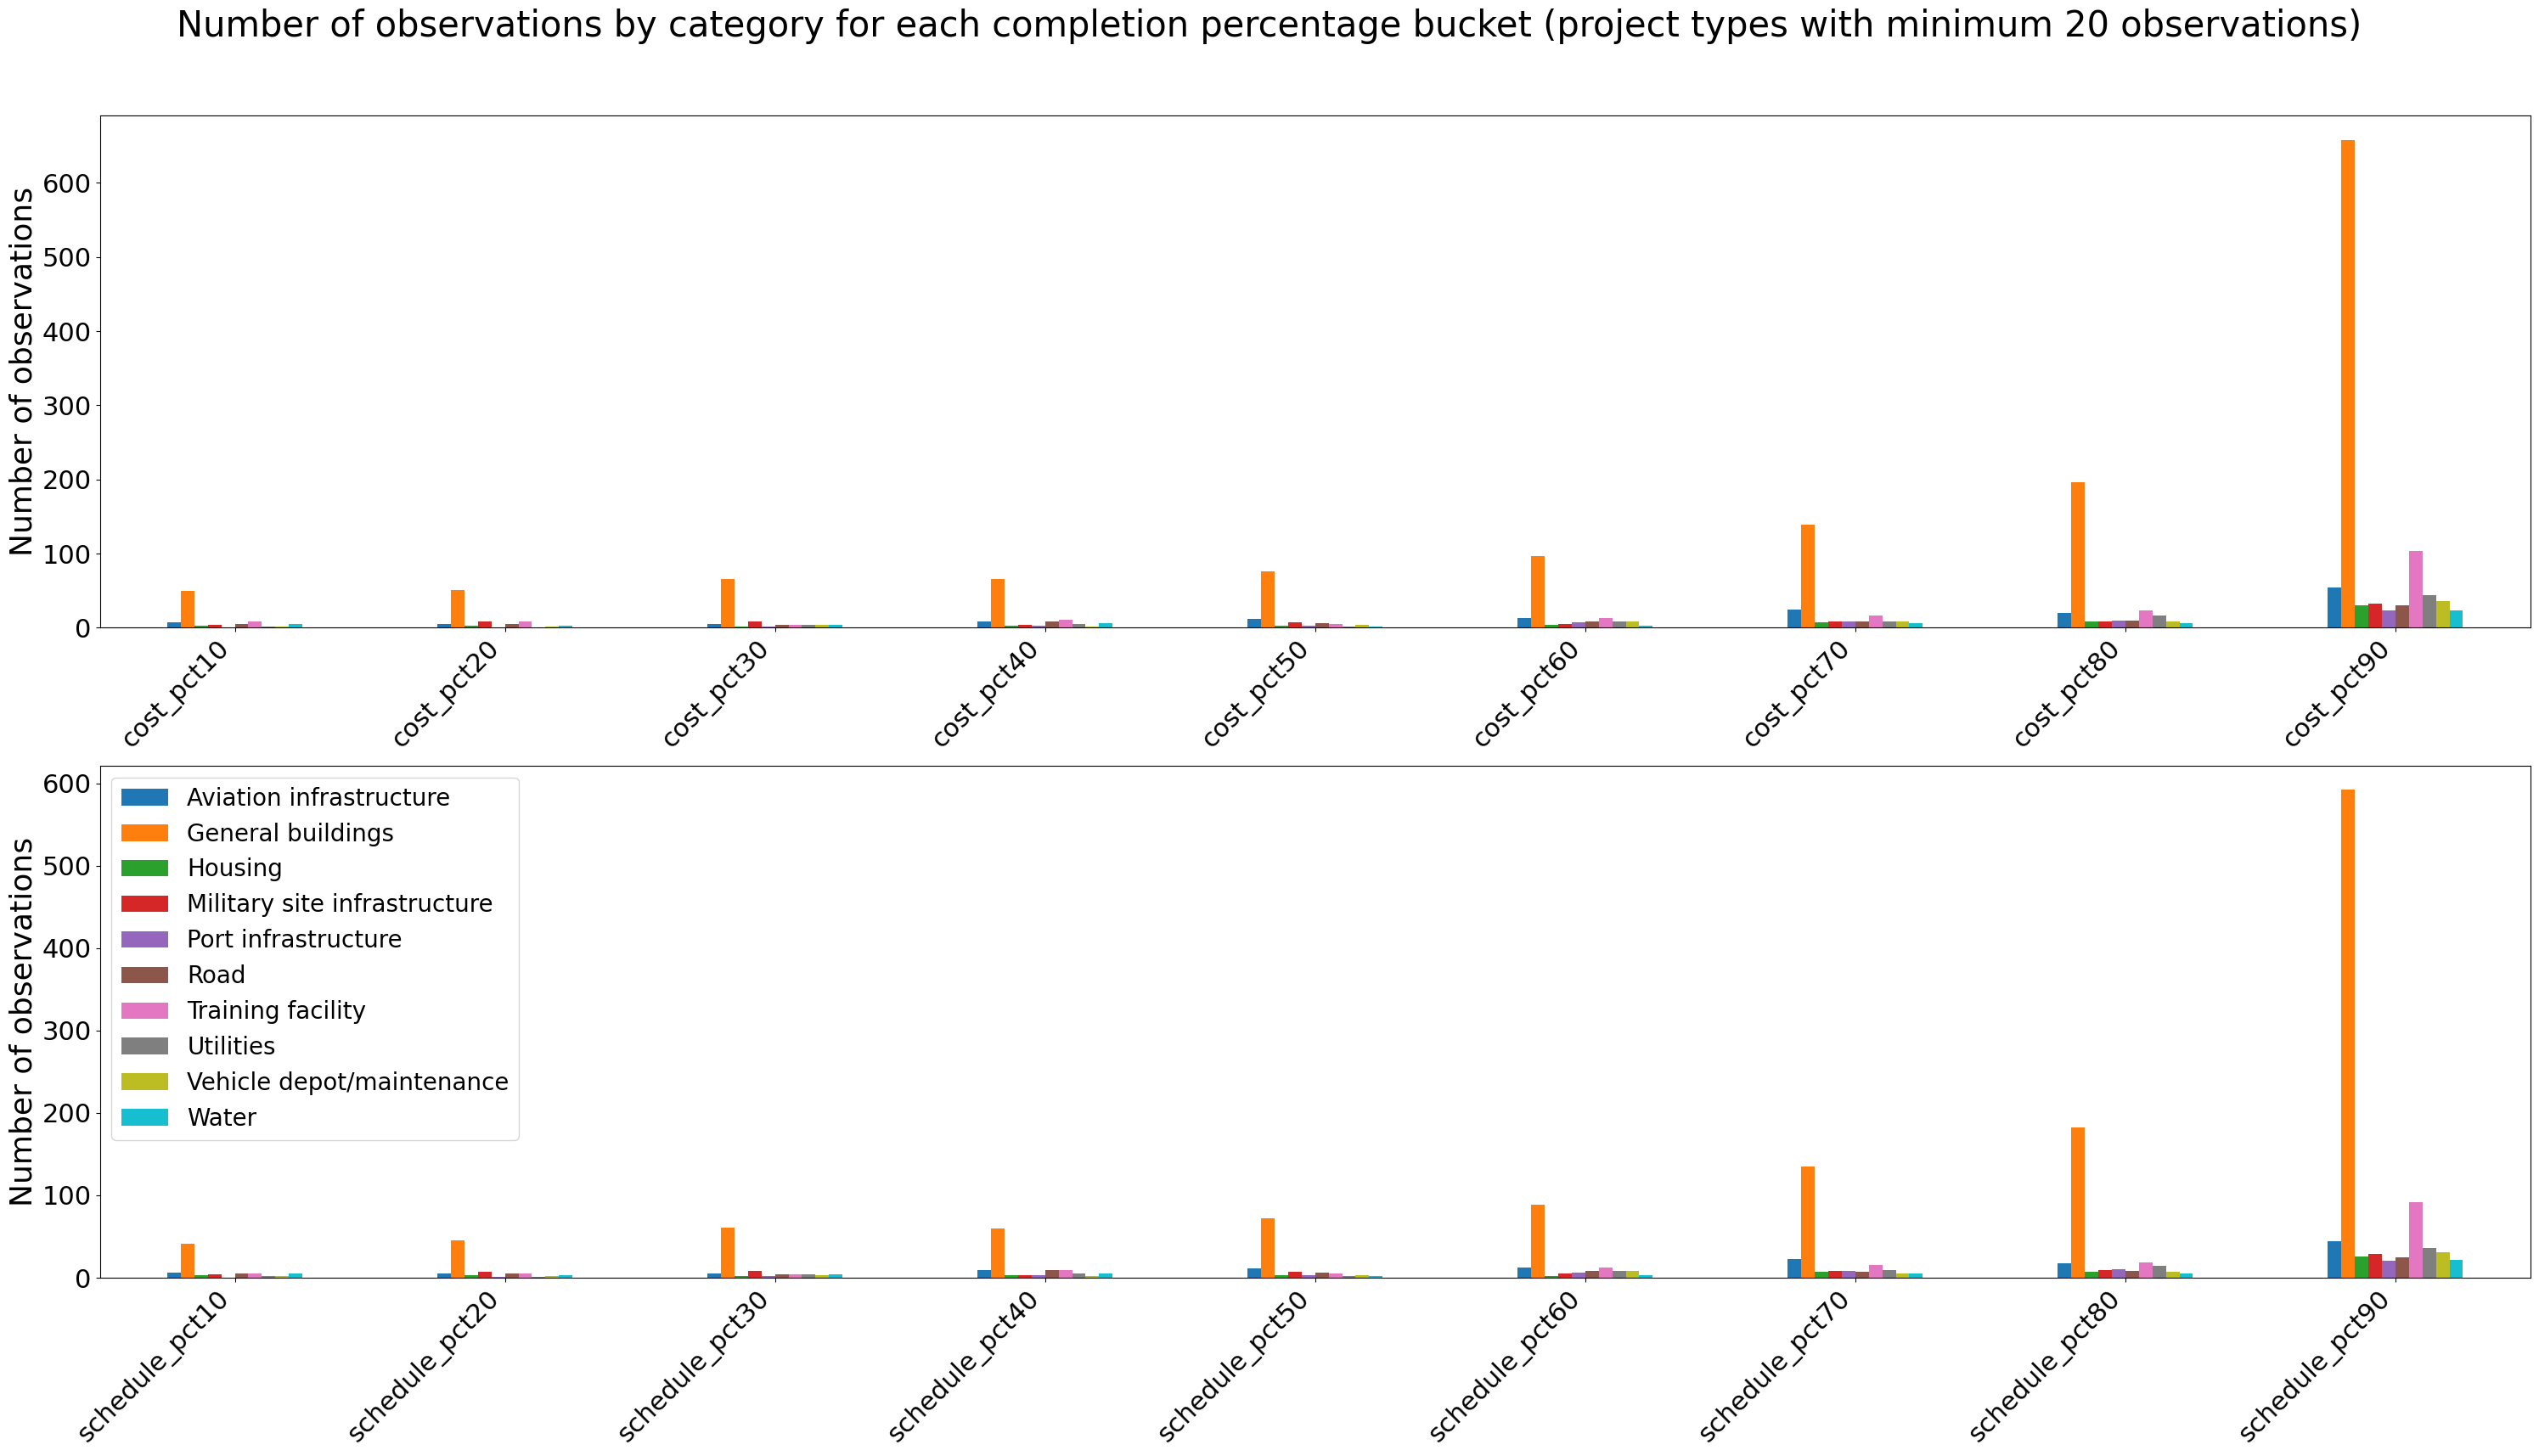

In [367]:
# Barchart for where we have min 50 projects
min_20 = df.project_subtype.value_counts()
min_20 = min_20[min_20 >= 20].index

# Barchart for cost/schedule counts at different percent complete
count_cost = df[df.project_subtype.isin(min_20)].melt(id_vars='project_subtype', value_vars=[f'cost_pct{i}' for i in range(10, 100, 10)]).dropna().groupby(['variable', 'project_subtype']).size().unstack(fill_value=0)
count_schedule = df[df.project_subtype.isin(min_20)].melt(id_vars='project_subtype', value_vars=[f'schedule_pct{i}' for i in range(10, 100, 10)]).dropna().groupby(['variable', 'project_subtype']).size().unstack(fill_value=0)

fig, axes = plt.subplots(2, 1, figsize = (30, 18))

count_cost.plot(kind='bar', stacked=False, ax=axes[0])
count_schedule.plot(kind='bar', stacked=False, ax=axes[1])

axes[0].set_xticklabels(count_cost.index, rotation=45, ha="right", size=22)
axes[1].set_xticklabels(count_schedule.index, rotation=45, ha="right", size=22)

axes[0].set_yticklabels(range(0, 700, 100), size=22)
axes[1].set_yticklabels(range(0, 700, 100), size=22)

axes[0].set_xlabel("")
axes[1].set_xlabel("")

axes[0].set_ylabel("Number of observations", size=26)
axes[1].set_ylabel("Number of observations", size=26)

axes[0].get_legend().remove()
axes[1].legend(prop={'size': 20})

fig.suptitle("Number of observations by category for each completion percentage bucket (project types with minimum 20 observations)", size=30)
fig.tight_layout(rect=[0, 0.03, 1, 0.95])

fig.savefig("../plots/observationsByStageByCat.png")


# 05: Boxplots for cost/schedule overurn by category

/var/folders/z7/sh9lp16n1f997dpqzbly6cfh0000gp/T/ipykernel_2341/414071106.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(df.project_subtype.unique(), rotation=45, ha="right")
/var/folders/z7/sh9lp16n1f997dpqzbly6cfh0000gp/T/ipykernel_2341/414071106.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(df.project_subtype.unique(), rotation=45, ha="right")


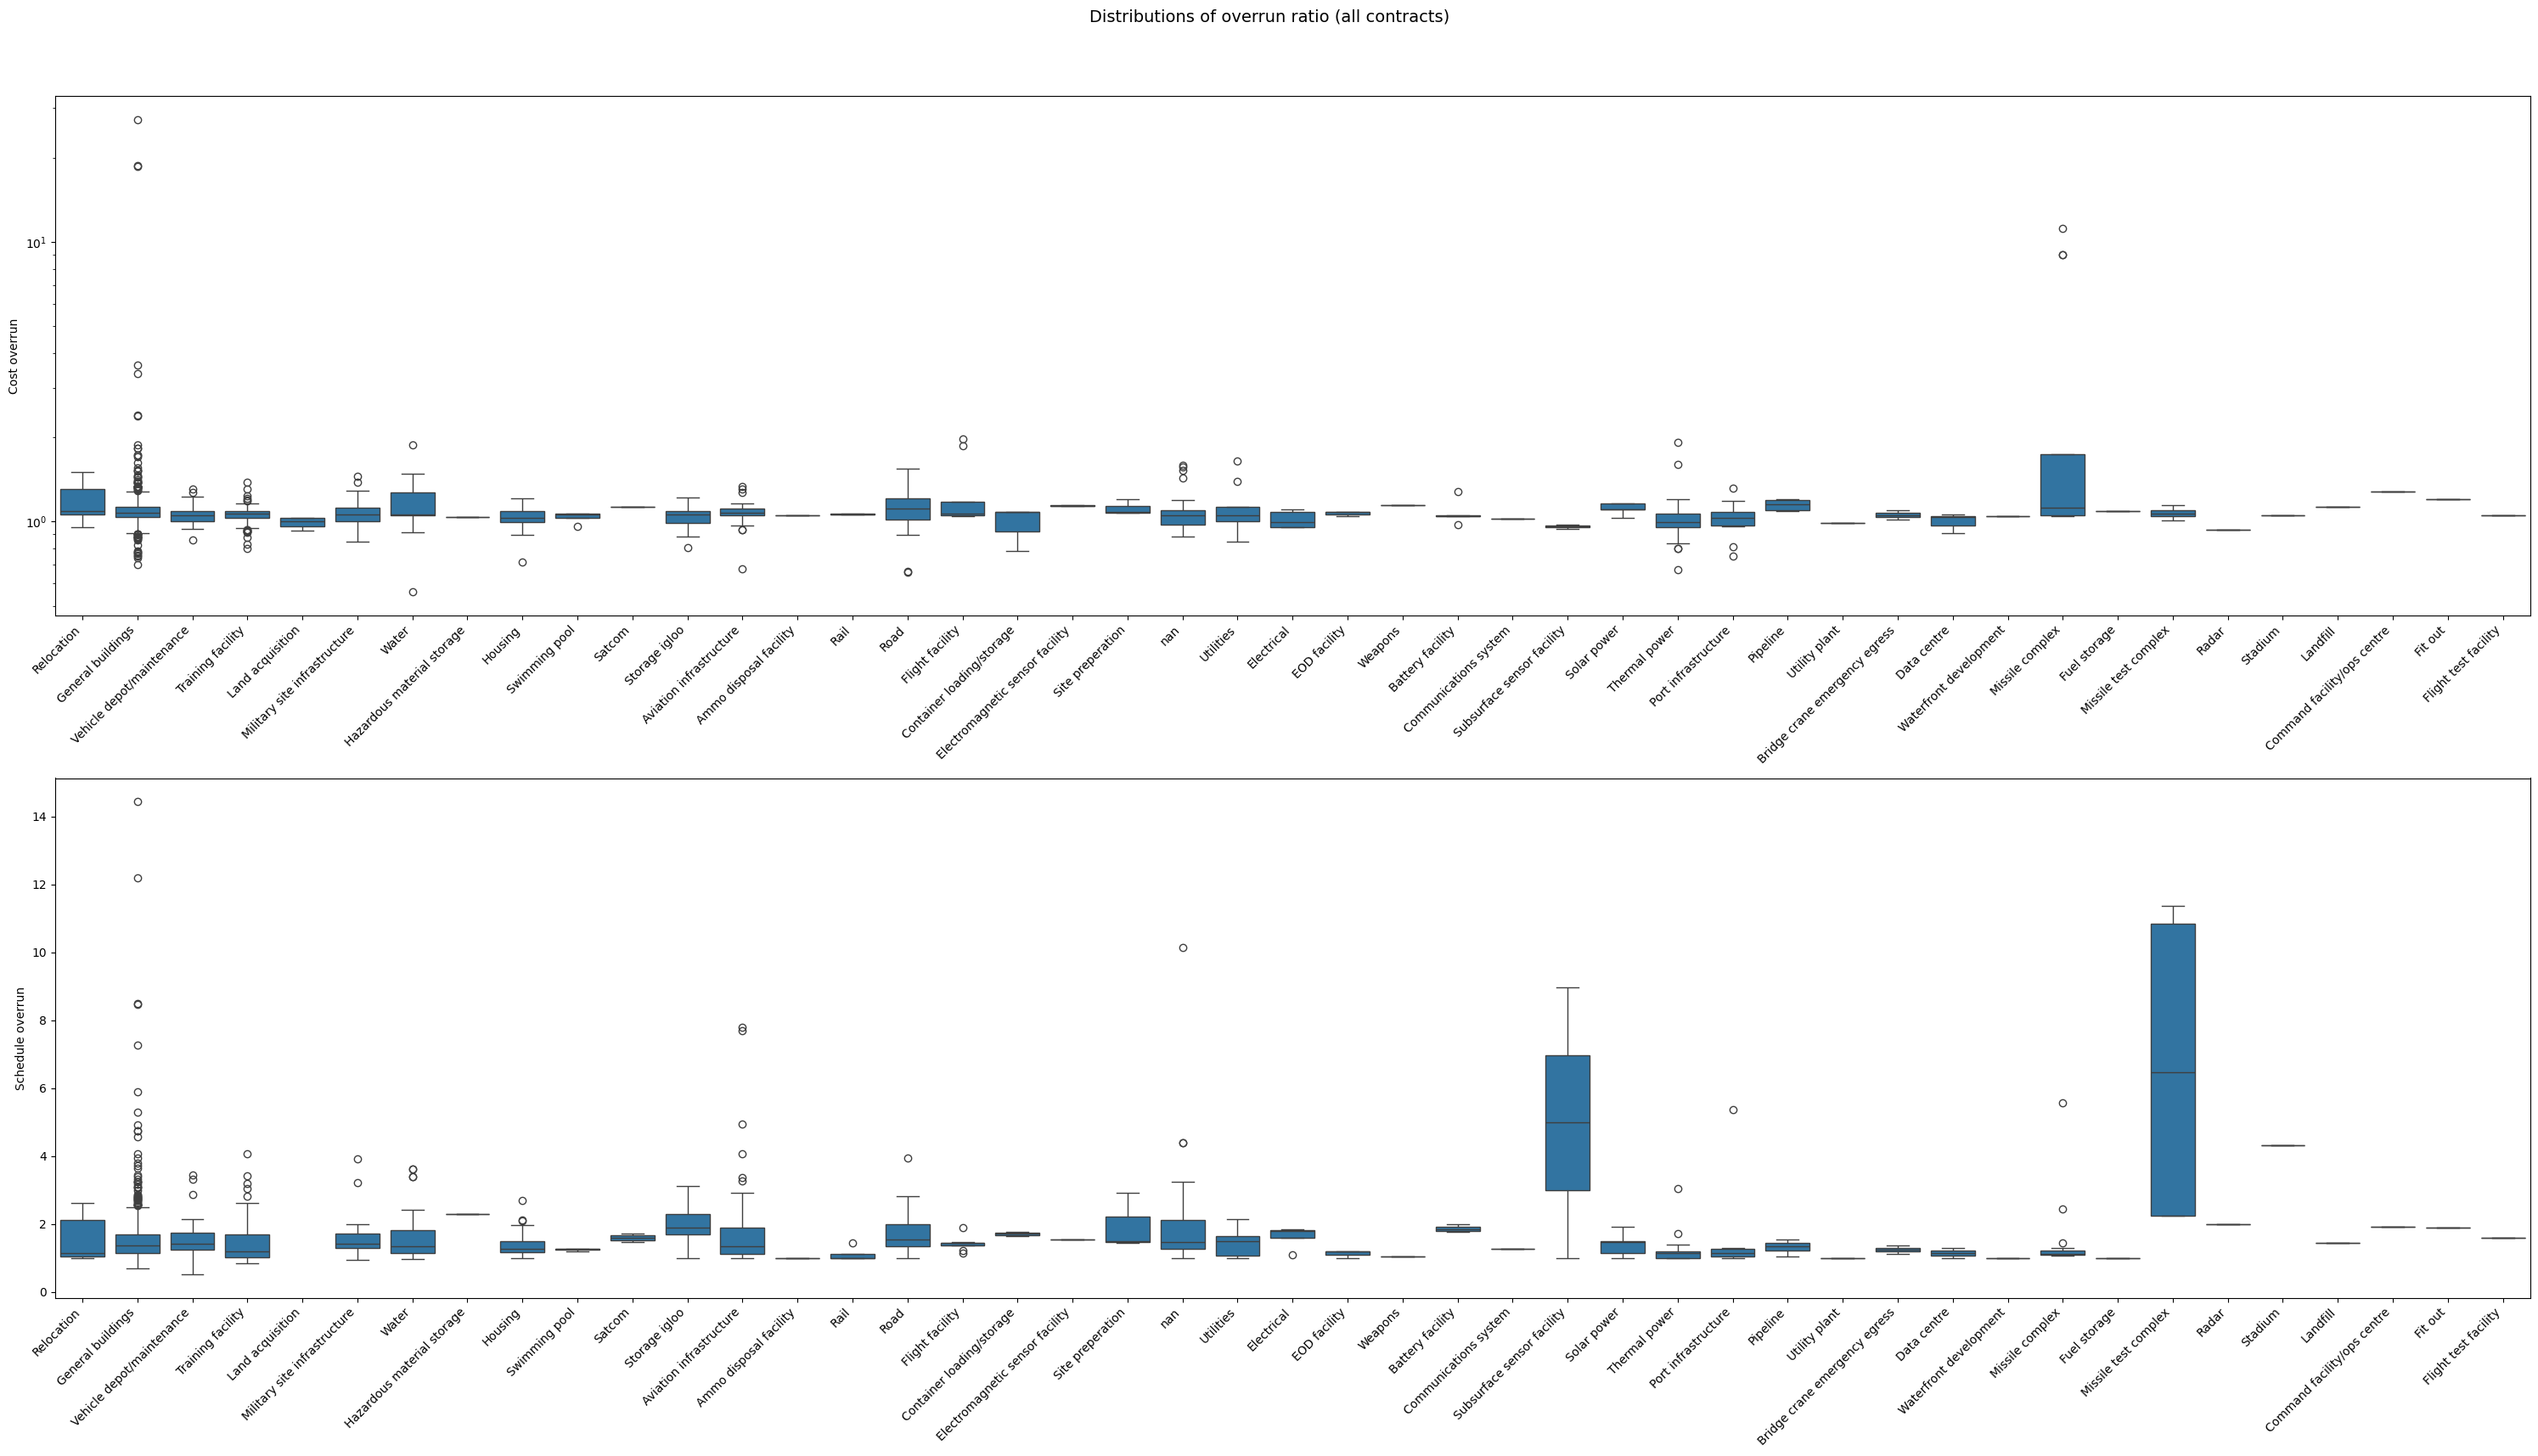

In [368]:
# All contracts
fig, axes = plt.subplots(2, 1, figsize=(30, 18))

sns.boxplot(x='project_subtype', y='cost_pct90', data=df, ax=axes[0], log_scale=True)
sns.boxplot(x='project_subtype', y='schedule_pct90', data=df, ax=axes[1])

axes[0].set_xticklabels(df.project_subtype.unique(), rotation=45, ha="right")
axes[1].set_xticklabels(df.project_subtype.unique(), rotation=45, ha="right")

axes[0].set_xlabel("")
axes[1].set_xlabel("")

axes[0].set_ylabel("Cost overrun")
axes[1].set_ylabel("Schedule overrun")

fig.suptitle("Distributions of overrun ratio (all contracts)", size=14)
fig.tight_layout(rect=[0, 0.03, 1, 0.95])

/var/folders/z7/sh9lp16n1f997dpqzbly6cfh0000gp/T/ipykernel_2341/1934243570.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(df[df.project_subtype.isin(min_20)].project_subtype.unique(), rotation=45, ha="right")
/var/folders/z7/sh9lp16n1f997dpqzbly6cfh0000gp/T/ipykernel_2341/1934243570.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(df[df.project_subtype.isin(min_20)].project_subtype.unique(), rotation=45, ha="right")


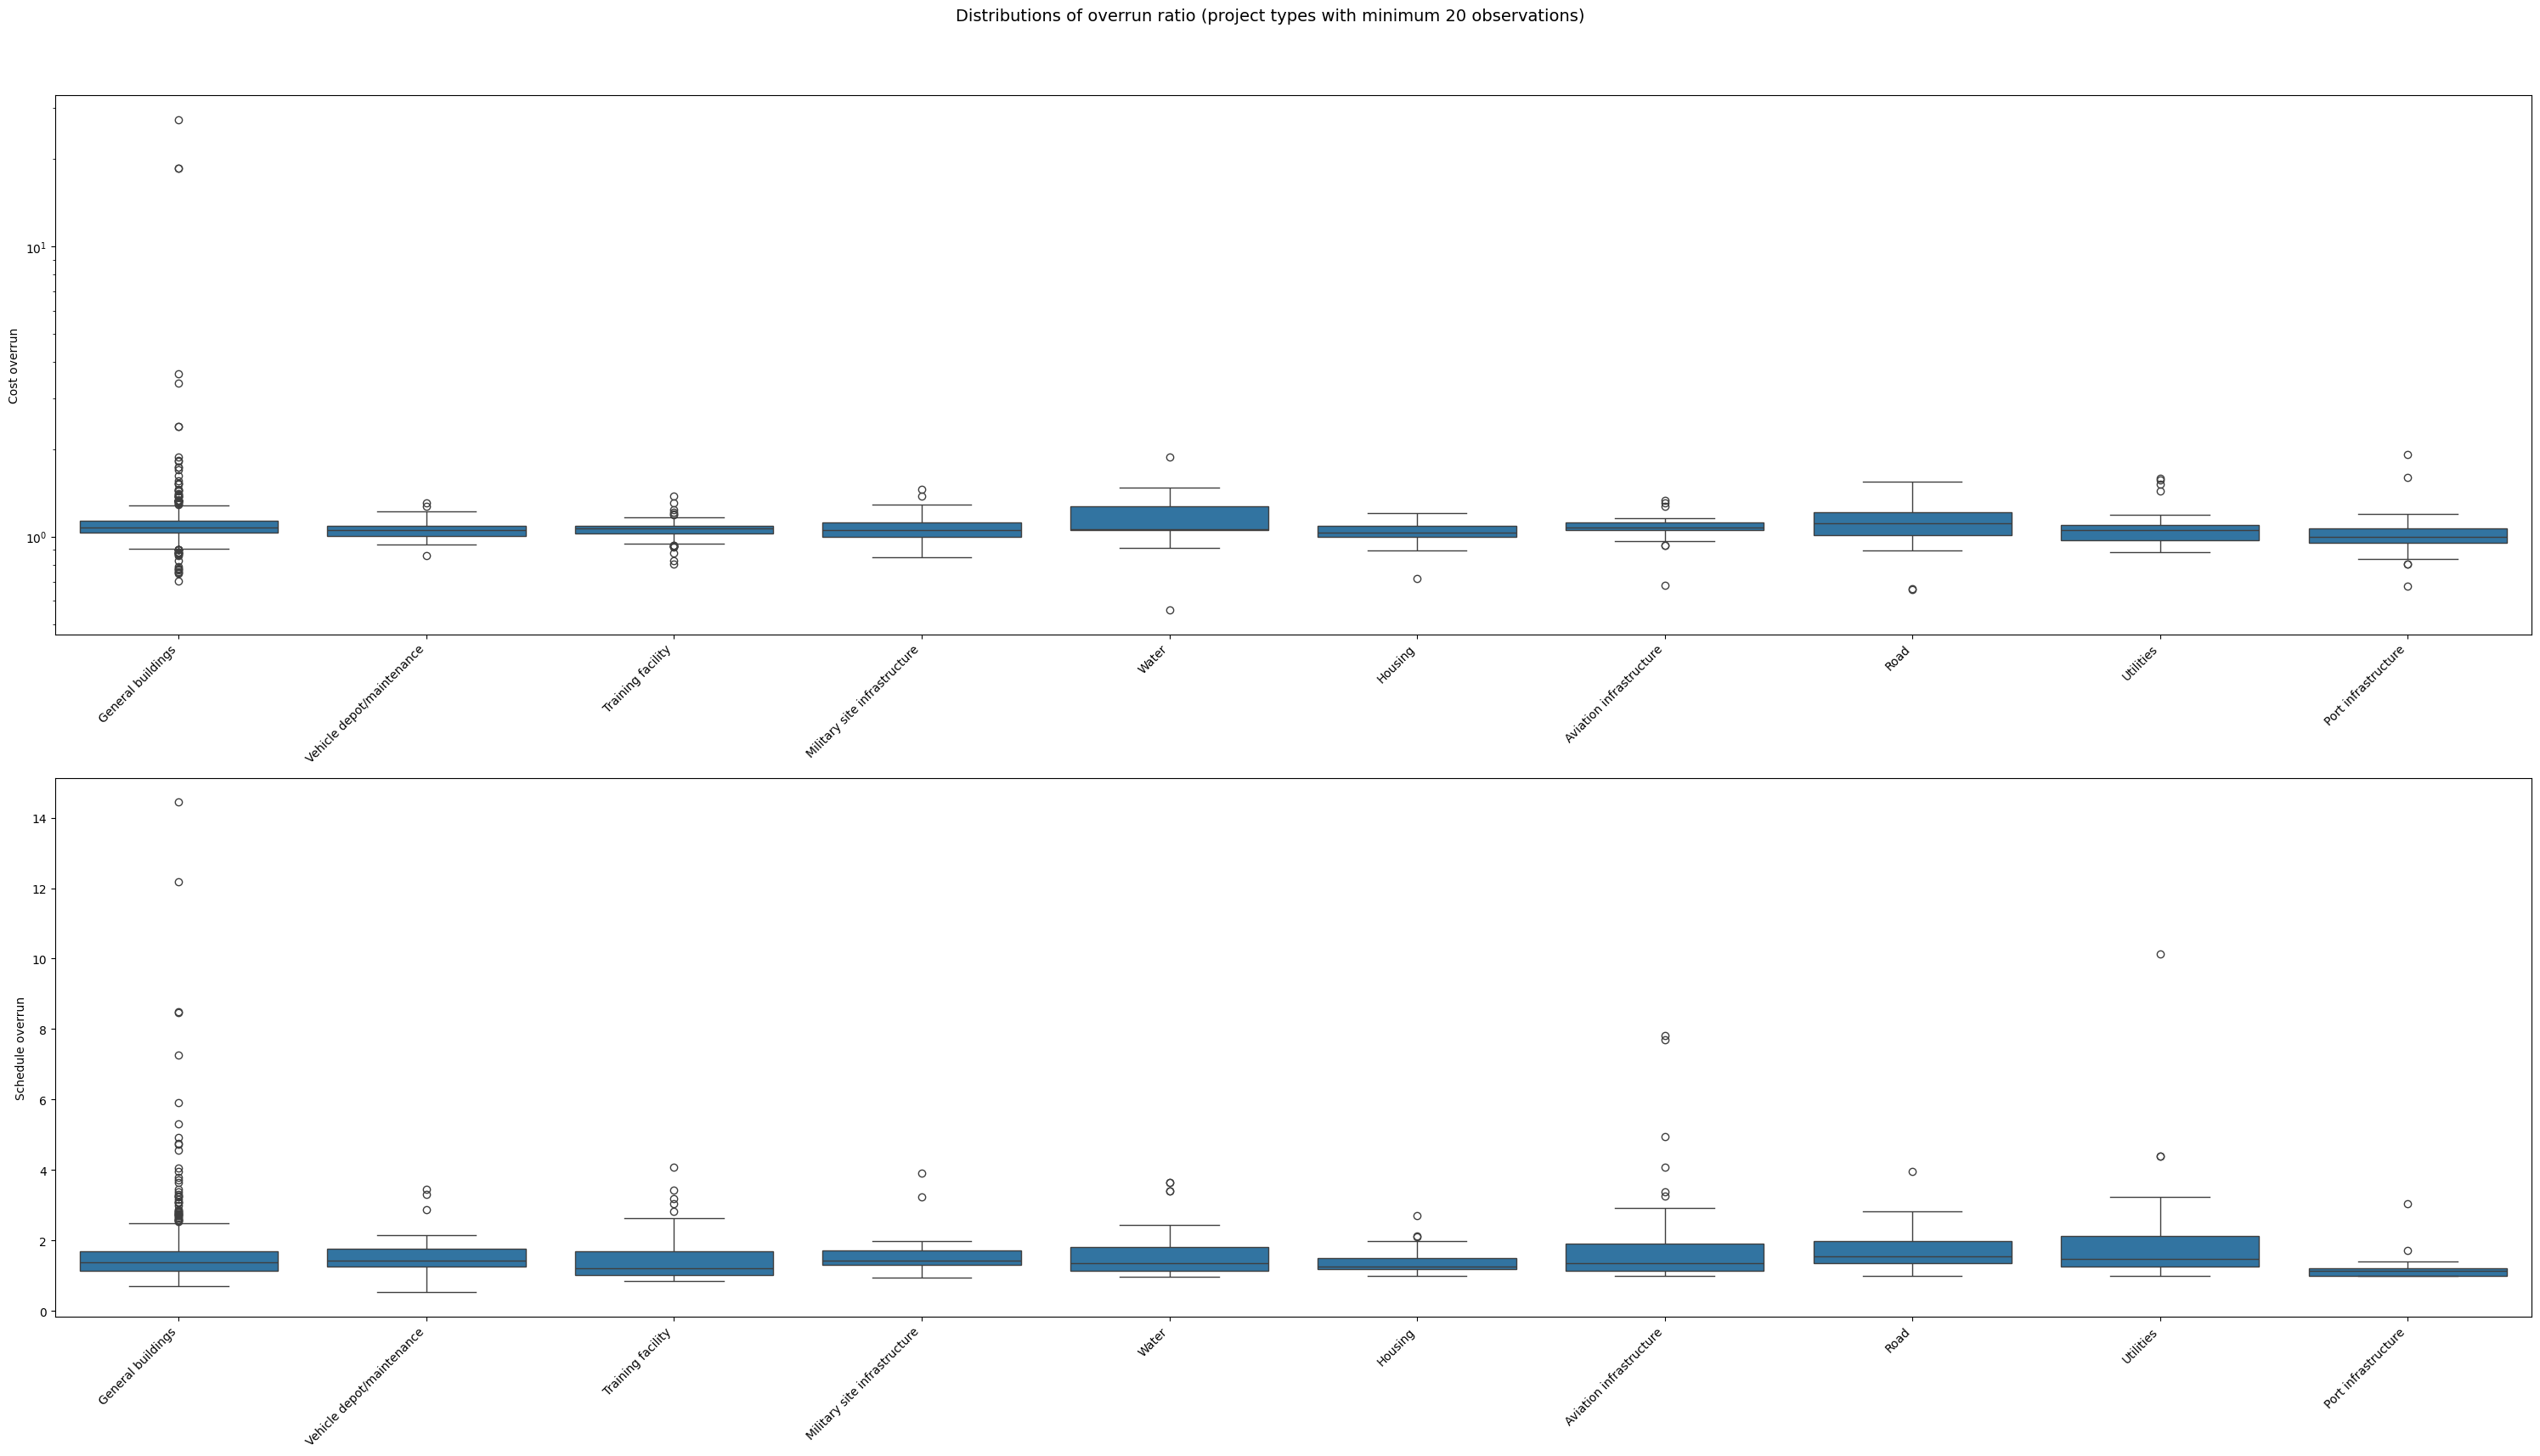

In [369]:
# Contracts with 20+ representations
min_20 = df.project_subtype.value_counts()
min_20 = min_20[min_20 >= 20].index

fig, axes = plt.subplots(2, 1, figsize=(30, 18))

sns.boxplot(x='project_subtype', y='cost_pct90', data=df[df.project_subtype.isin(min_20)], ax=axes[0], log_scale=True)
sns.boxplot(x='project_subtype', y='schedule_pct90', data=df[df.project_subtype.isin(min_20)], ax=axes[1])

axes[0].set_xticklabels(df[df.project_subtype.isin(min_20)].project_subtype.unique(), rotation=45, ha="right")
axes[1].set_xticklabels(df[df.project_subtype.isin(min_20)].project_subtype.unique(), rotation=45, ha="right")

axes[0].set_xlabel("")
axes[1].set_xlabel("")

axes[0].set_ylabel("Cost overrun")
axes[1].set_ylabel("Schedule overrun")

fig.suptitle("Distributions of overrun ratio (project types with minimum 20 observations)", size=14)
fig.tight_layout(rect=[0, 0.03, 1, 0.95])

# 06: Show how categories compare moving across pct complete buckets

In [370]:
# Get data 

min_20 = df.project_subtype.value_counts()
min_20 = min_20[min_20 >= 20].index

cost_melted = df[["project_subtype"]+[f"cost_pct{i}" for i in range(10, 100, 10)]].melt(id_vars=["project_subtype"], var_name="Completion stage", value_name="Cost overrun")
schedule_melted = df[["project_subtype"]+[f"schedule_pct{i}" for i in range(10, 100, 10)]].melt(id_vars=["project_subtype"], var_name="Completion stage", value_name="Schedule overrun")

cost_melted_min20 = df[df.project_subtype.isin(min_20)][["project_subtype"]+[f"cost_pct{i}" for i in range(10, 100, 10)]].melt(id_vars=["project_subtype"], var_name="Completion stage", value_name="Cost overrun")
schedule_melted_min20 = df[df.project_subtype.isin(min_20)][["project_subtype"]+[f"schedule_pct{i}" for i in range(10, 100, 10)]].melt(id_vars=["project_subtype"], var_name="Completion stage", value_name="Schedule overrun")


/var/folders/z7/sh9lp16n1f997dpqzbly6cfh0000gp/T/ipykernel_2341/3787790190.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels([f"cost_pct{i}" for i in range(10, 100, 10)], rotation=45, ha="right")
/var/folders/z7/sh9lp16n1f997dpqzbly6cfh0000gp/T/ipykernel_2341/3787790190.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels([f"schedule_pct{i}" for i in range(10, 100, 10)], rotation=45, ha="right")


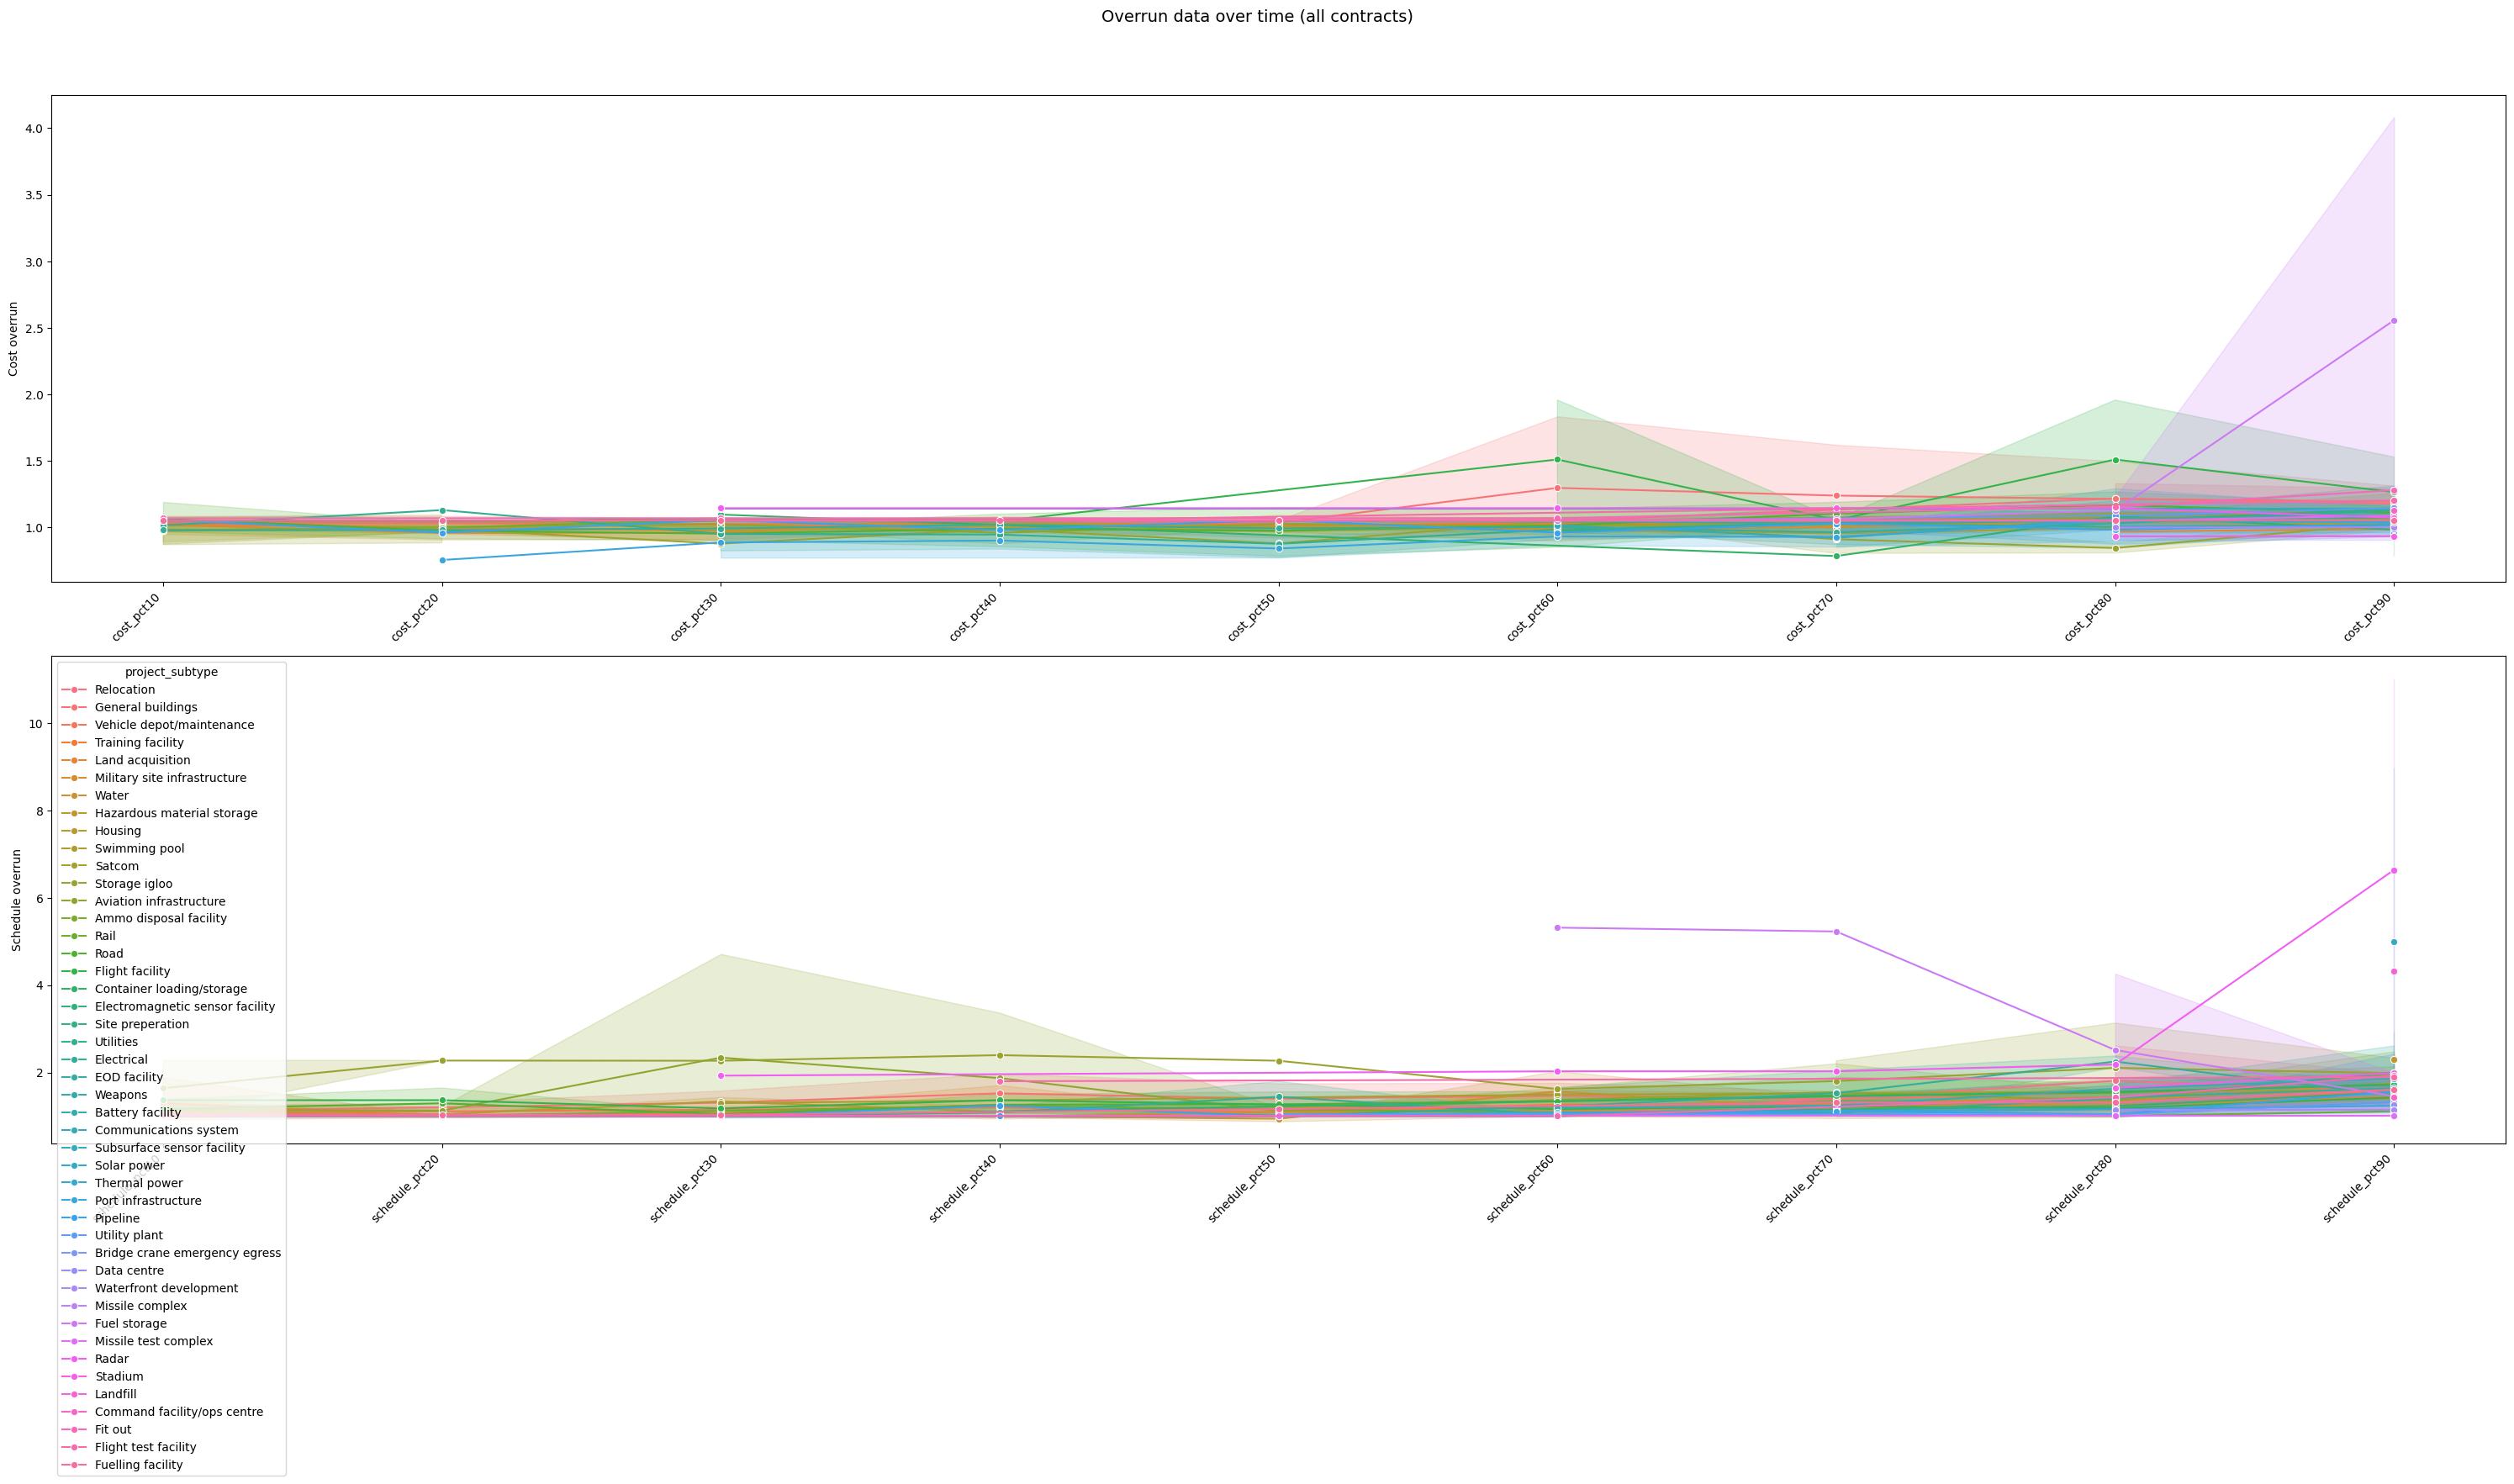

In [371]:
# Line graph // overrun over time // all project types
fig, axes = plt.subplots(2, 1, figsize=(30, 18))

sns.lineplot(data=cost_melted, x="Completion stage", y="Cost overrun", hue="project_subtype", marker="o", ax=axes[0])
sns.lineplot(data=schedule_melted, x="Completion stage", y="Schedule overrun", hue="project_subtype", marker="o", ax=axes[1])

axes[0].set_xticklabels([f"cost_pct{i}" for i in range(10, 100, 10)], rotation=45, ha="right")
axes[1].set_xticklabels([f"schedule_pct{i}" for i in range(10, 100, 10)], rotation=45, ha="right")

axes[0].set_xlabel("")
axes[1].set_xlabel("")

axes[0].set_ylabel("Cost overrun")
axes[1].set_ylabel("Schedule overrun")

axes[0].get_legend().remove()

fig.suptitle("Overrun data over time (all contracts)", size=14)
fig.tight_layout(rect=[0, 0.03, 1, 0.95])

/var/folders/z7/sh9lp16n1f997dpqzbly6cfh0000gp/T/ipykernel_2341/557296114.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels([f"cost_pct{i}" for i in range(10, 100, 10)], rotation=45, ha="right")
/var/folders/z7/sh9lp16n1f997dpqzbly6cfh0000gp/T/ipykernel_2341/557296114.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels([f"schedule_pct{i}" for i in range(10, 100, 10)], rotation=45, ha="right")


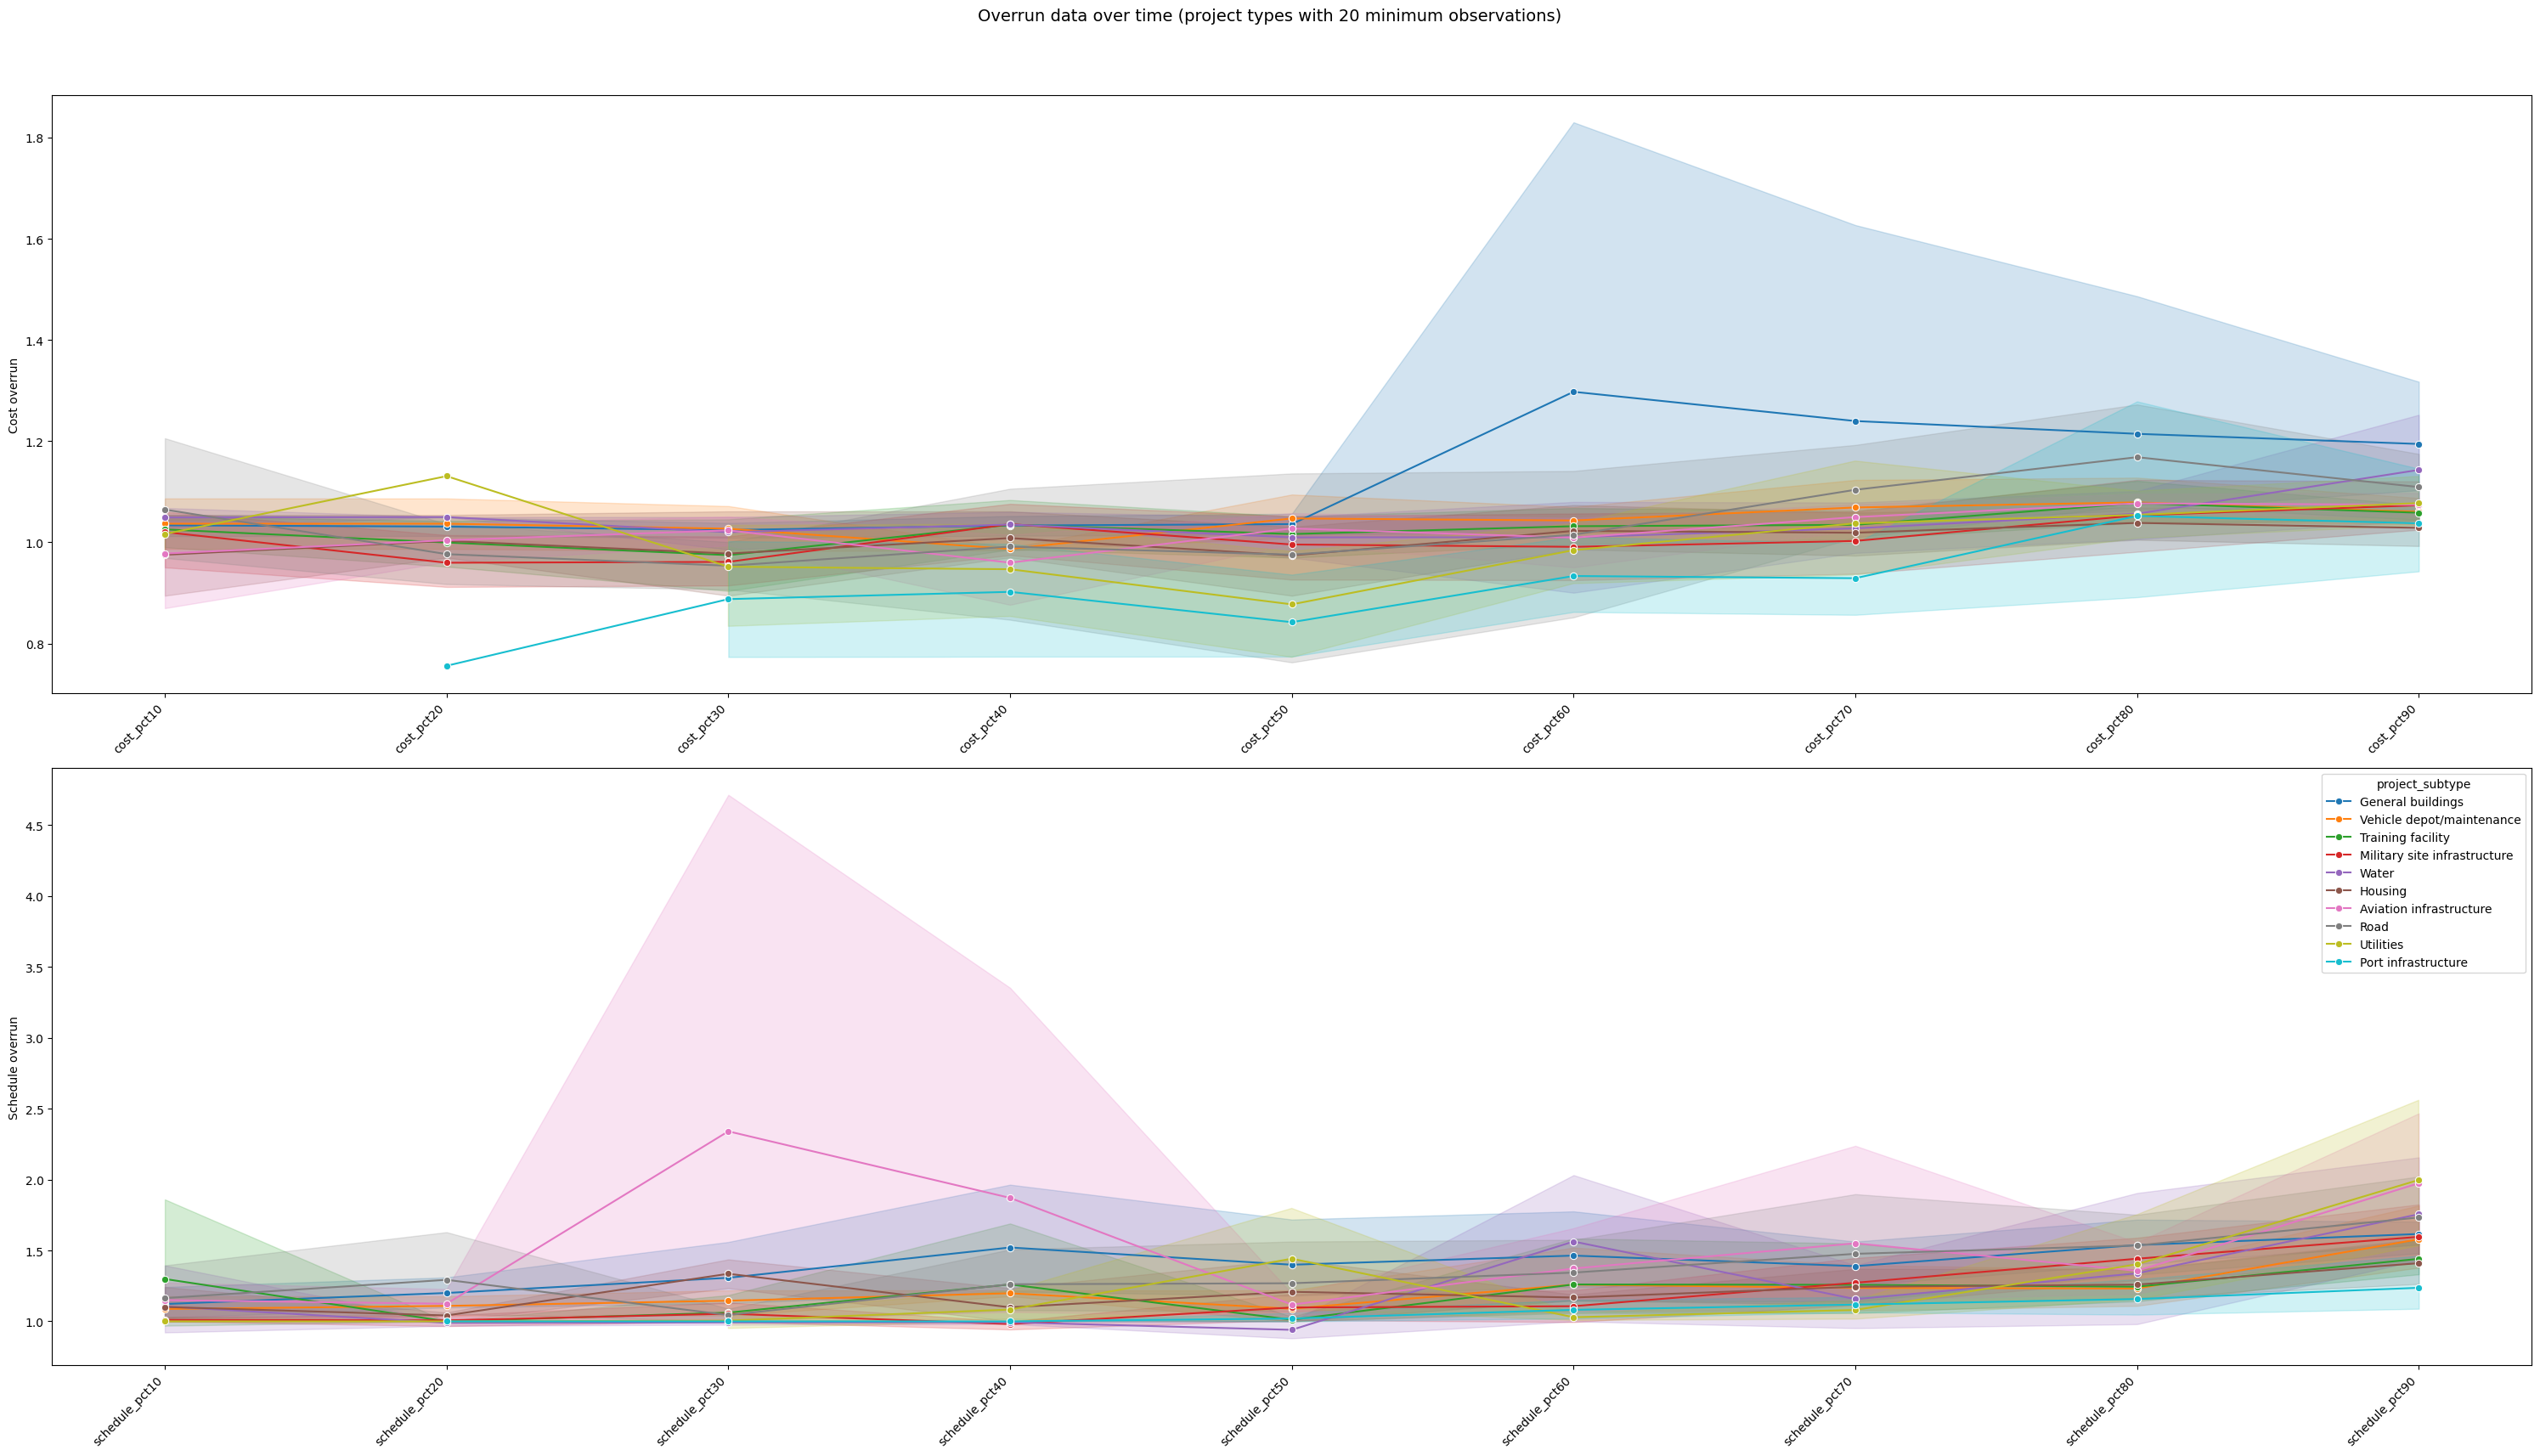

In [372]:
# Line graph // overrun over time // project types with 20 minimum observations
fig, axes = plt.subplots(2, 1, figsize=(30, 18))

sns.lineplot(data=cost_melted_min20, x="Completion stage", y="Cost overrun", hue="project_subtype", marker="o", ax=axes[0])
sns.lineplot(data=schedule_melted_min20, x="Completion stage", y="Schedule overrun", hue="project_subtype", marker="o", ax=axes[1])

axes[0].set_xticklabels([f"cost_pct{i}" for i in range(10, 100, 10)], rotation=45, ha="right")
axes[1].set_xticklabels([f"schedule_pct{i}" for i in range(10, 100, 10)], rotation=45, ha="right")

axes[0].set_xlabel("")
axes[1].set_xlabel("")

axes[0].set_ylabel("Cost overrun")
axes[1].set_ylabel("Schedule overrun")

axes[0].get_legend().remove()

fig.suptitle("Overrun data over time (project types with 20 minimum observations)", size=14)
fig.tight_layout(rect=[0, 0.03, 1, 0.95])

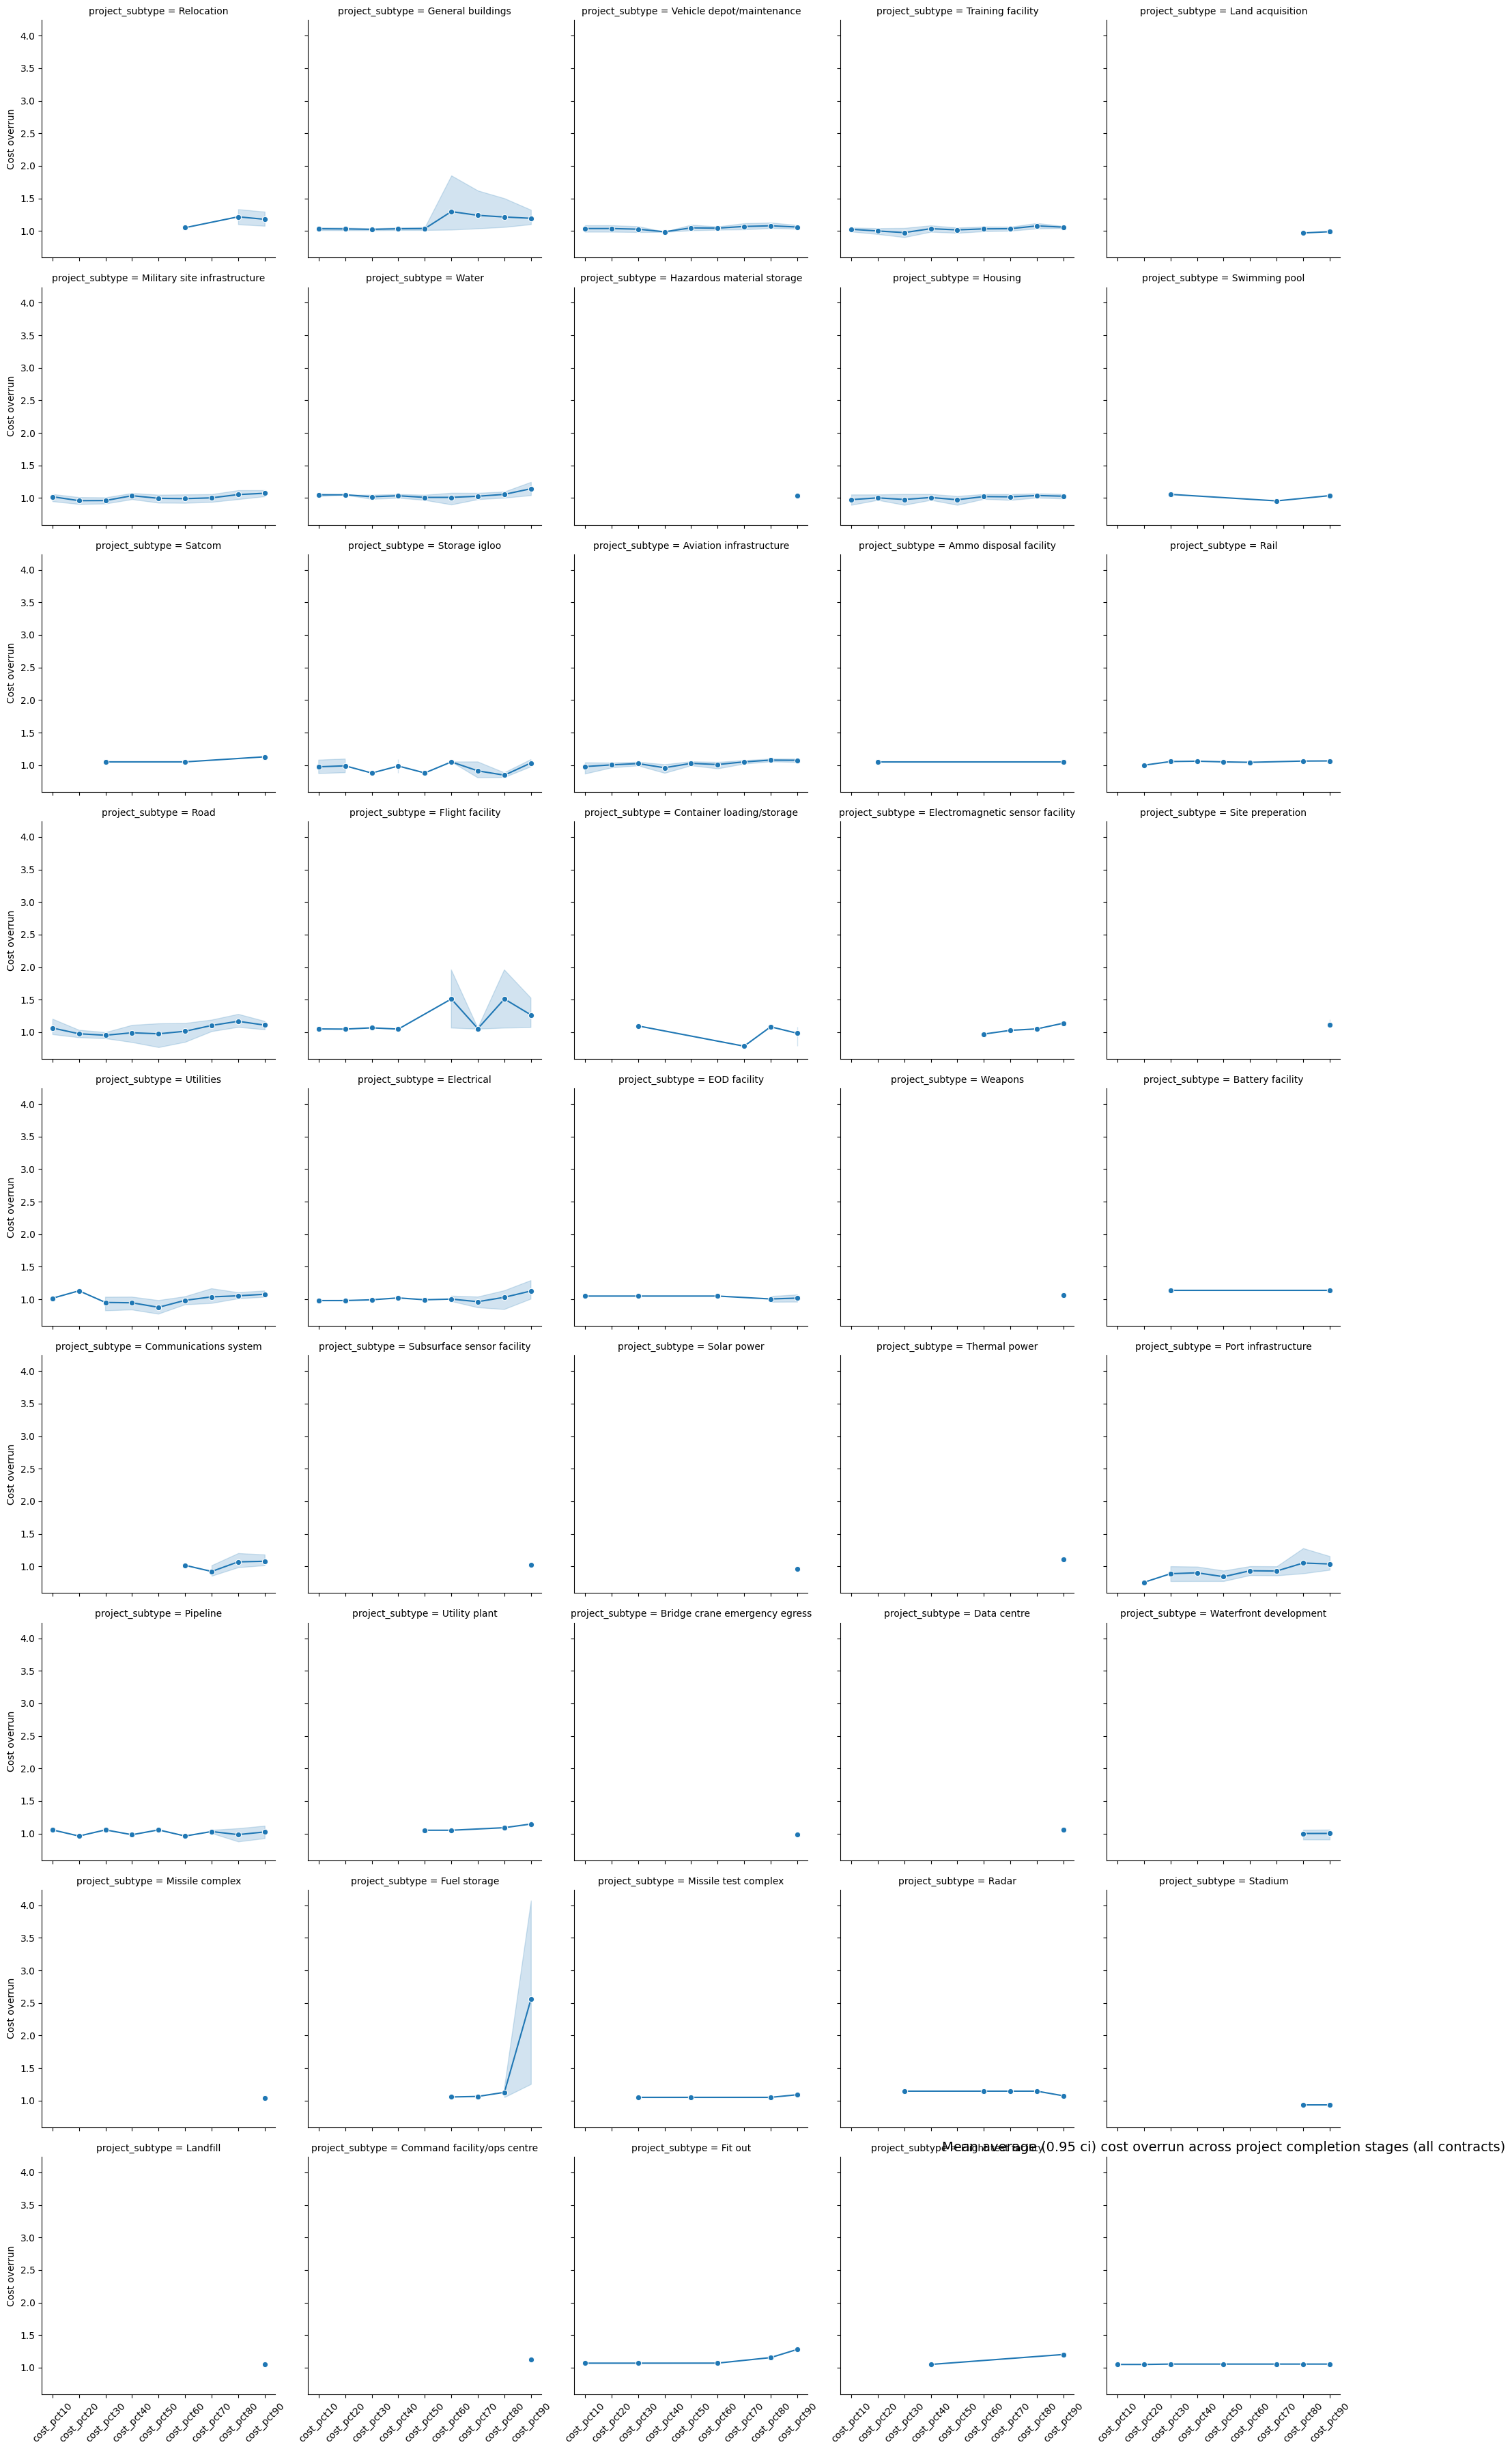

In [373]:
# Cost overrun facet grid
plot = sns.FacetGrid(cost_melted, col="project_subtype", col_wrap=5, height=4, sharey=True)
plot.map(sns.lineplot, "Completion stage", "Cost overrun", marker="o")
[plt.setp(ax.get_xticklabels(), rotation=45) for ax in plot.axes.flat]
[plt.setp(ax.set_xlabel(""), rotation=45) for ax in plot.axes.flat]
plt.title("Mean average (0.95 ci) cost overrun across project completion stages (all contracts)", size=14)
plt.tight_layout()
plt.show()

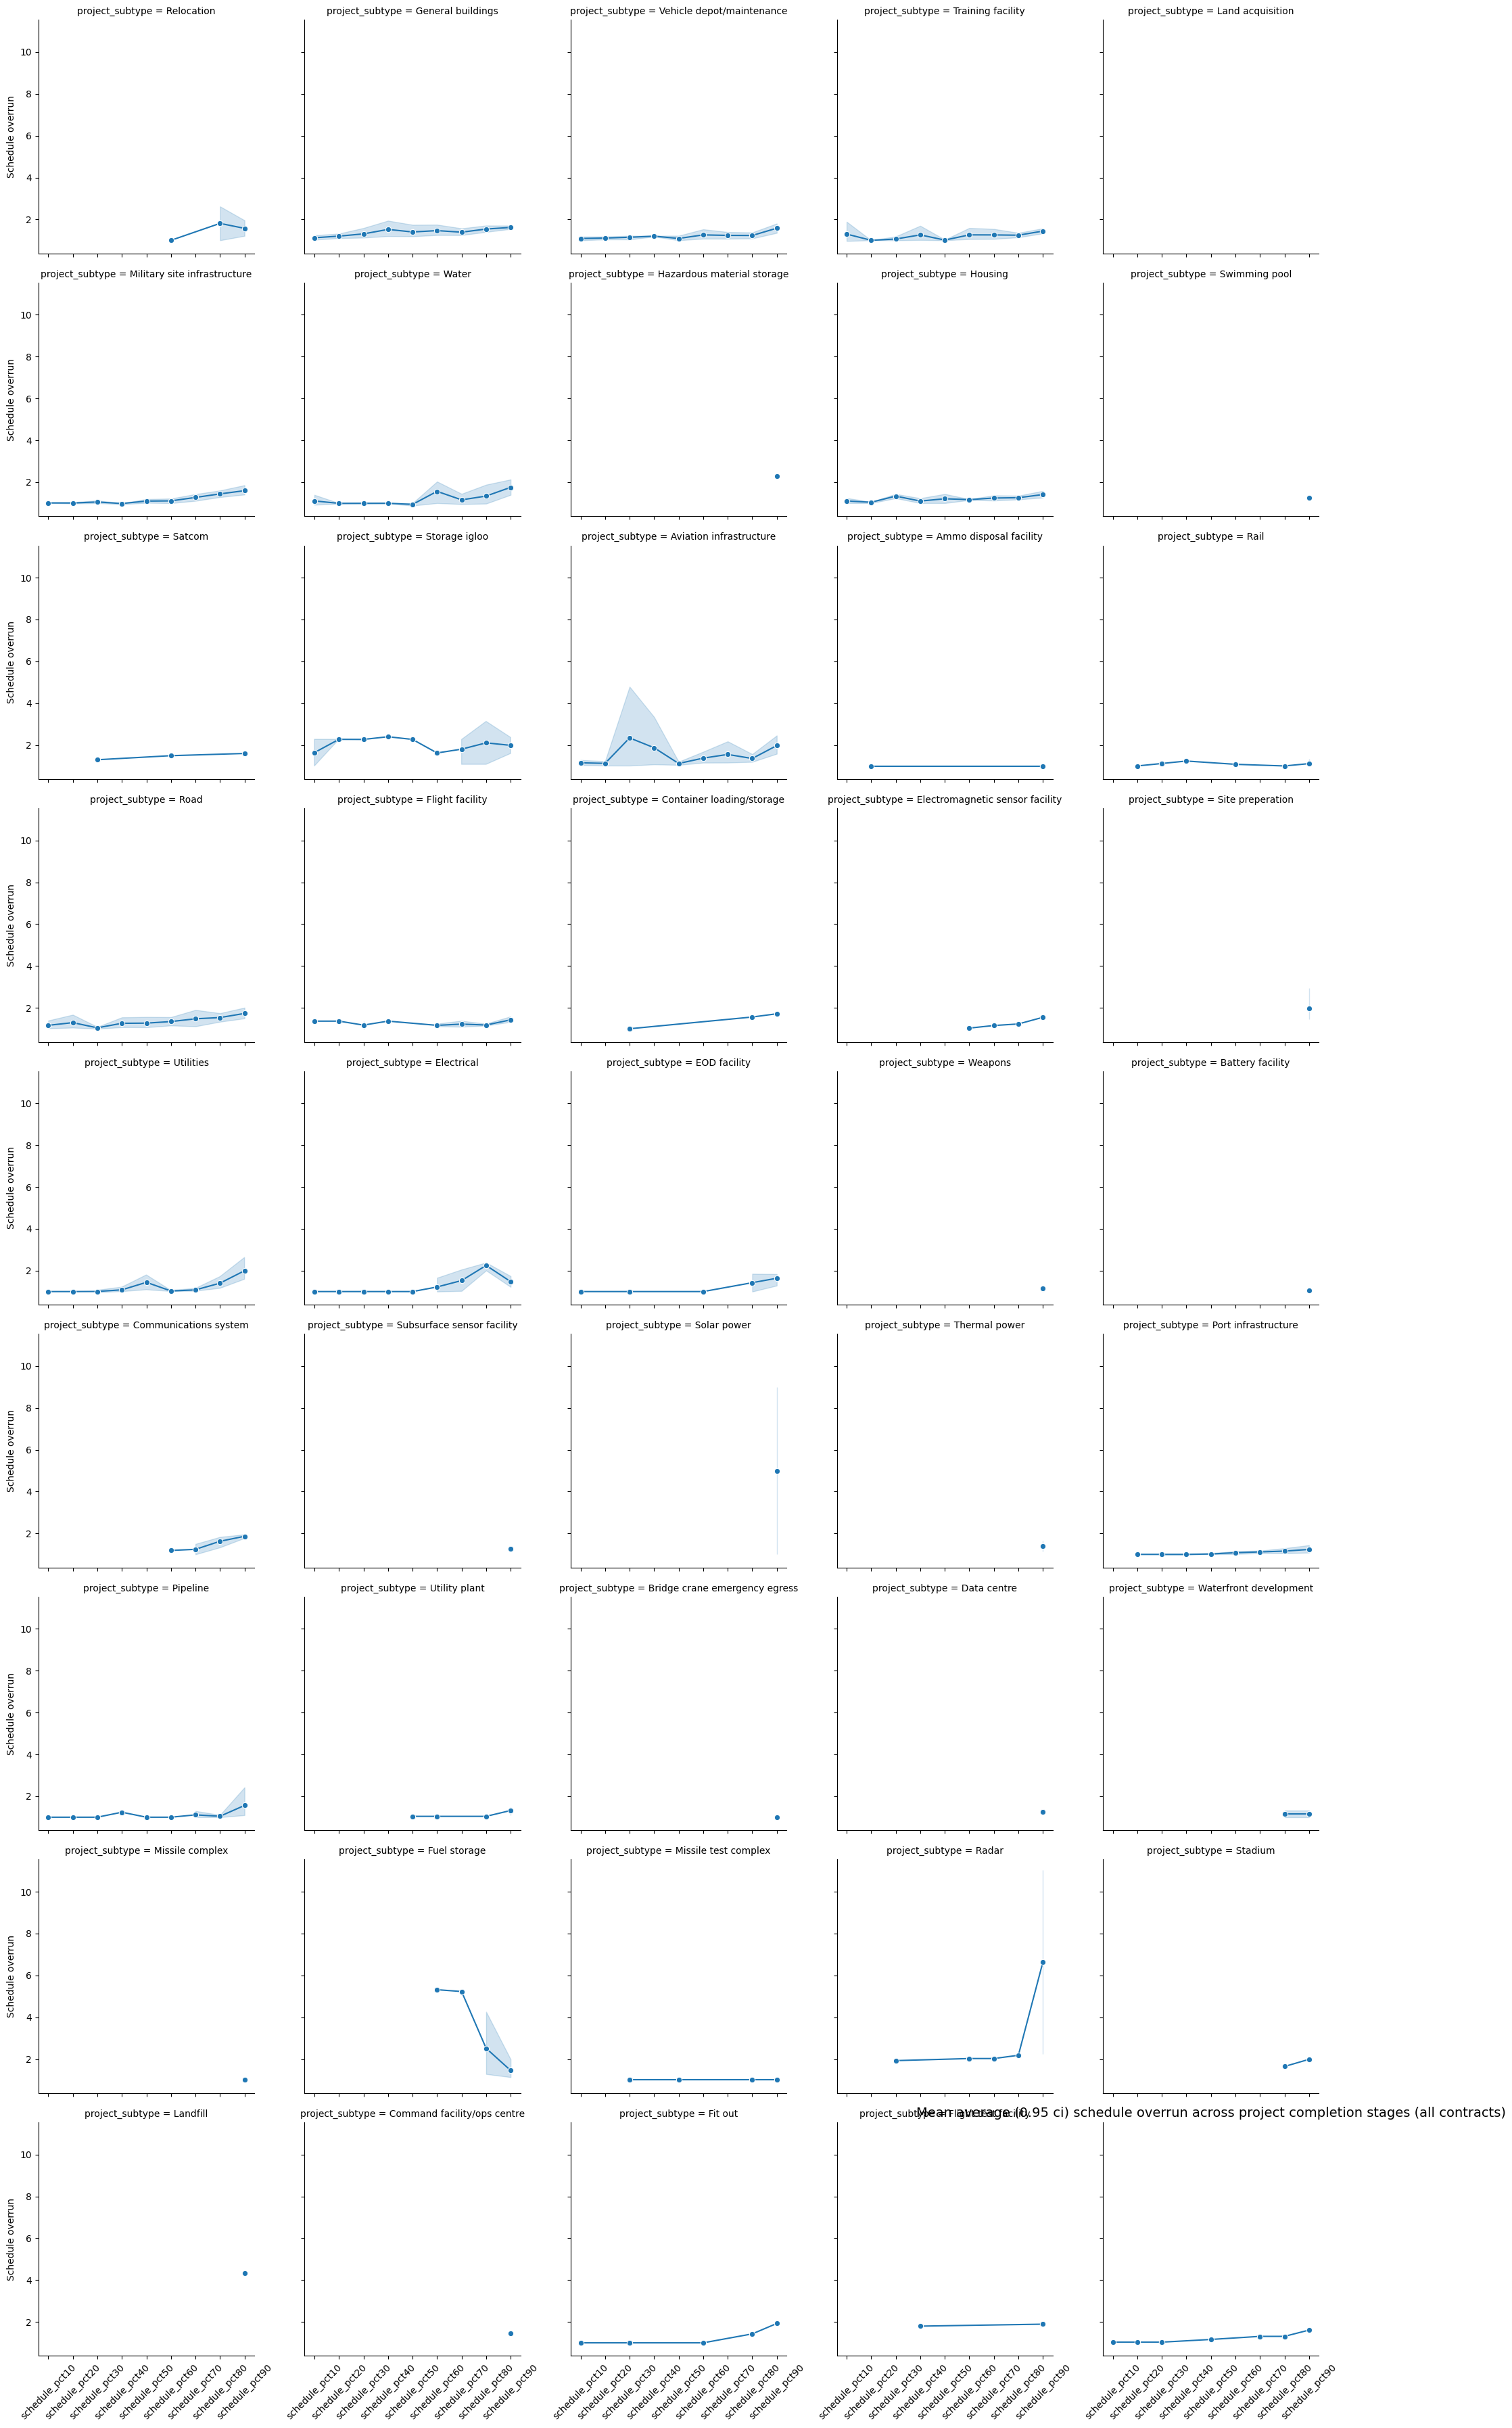

In [374]:
# Schedule overrun facet grid
plot = sns.FacetGrid(schedule_melted, col="project_subtype", col_wrap=5, height=4, sharey=True)
plot.map(sns.lineplot, "Completion stage", "Schedule overrun", marker="o")
[plt.setp(ax.get_xticklabels(), rotation=45) for ax in plot.axes.flat]
[plt.setp(ax.set_xlabel(""), rotation=45) for ax in plot.axes.flat]
plt.title("Mean average (0.95 ci) schedule overrun across project completion stages (all contracts)", size=14)
plt.tight_layout()
plt.show()

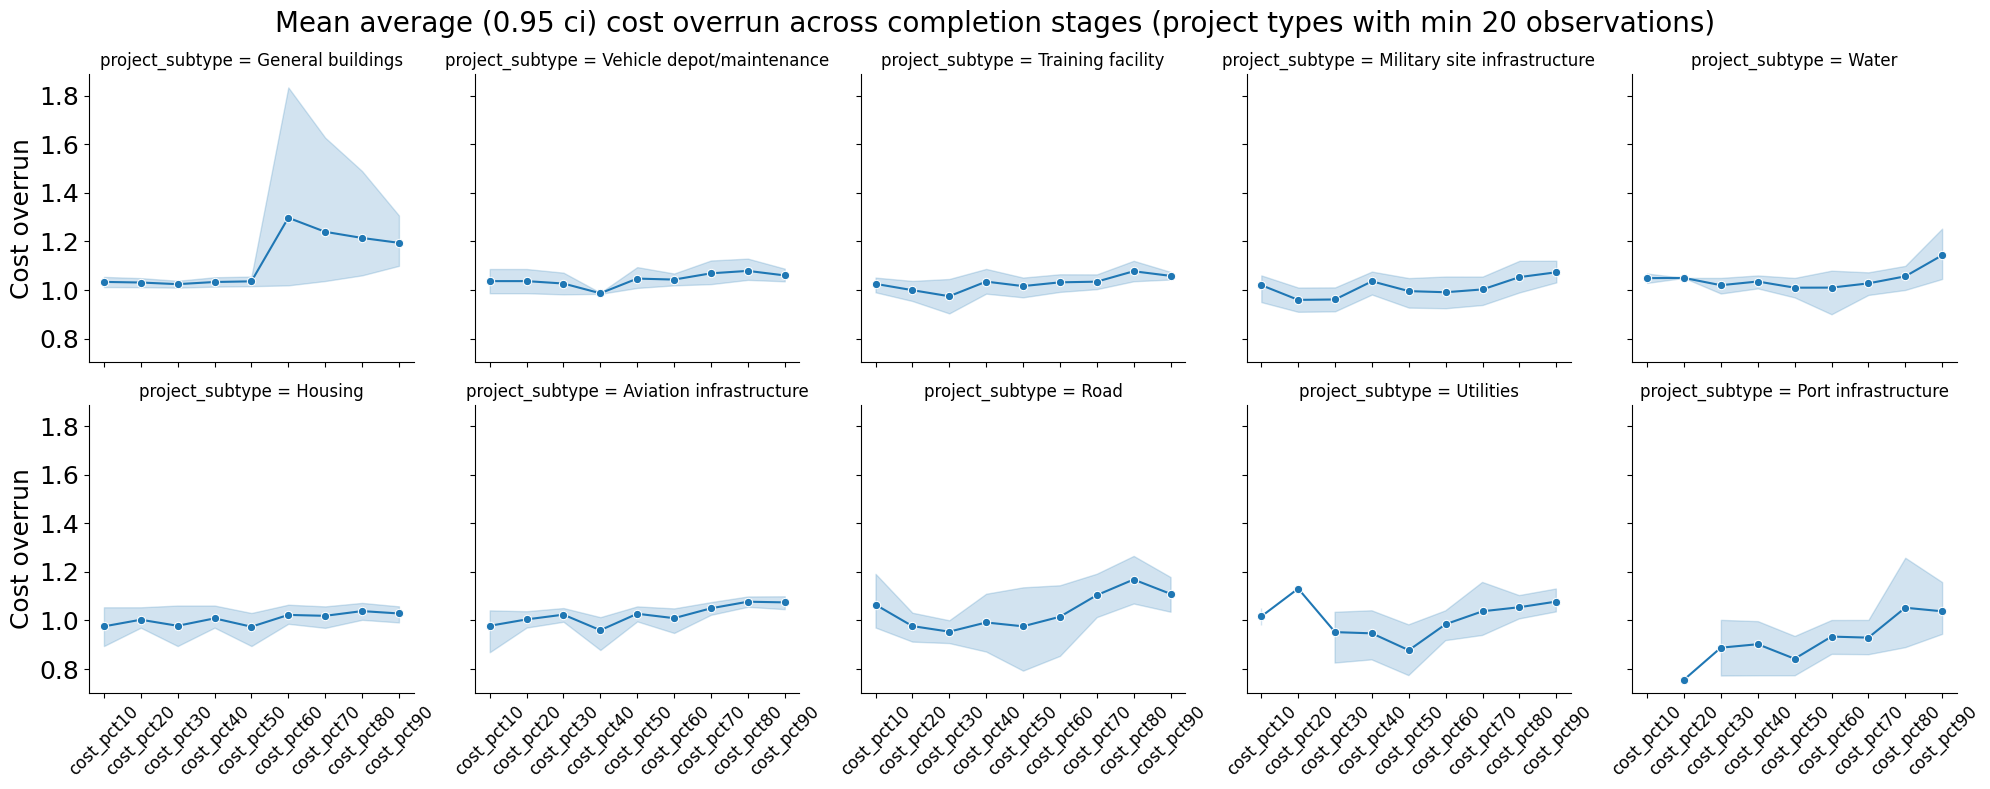

In [375]:
# Cost overrun facet grid, min 20 projects
plot = sns.FacetGrid(cost_melted_min20, col="project_subtype", col_wrap=5, height=4, sharey=True)
plot.map(sns.lineplot, "Completion stage", "Cost overrun", marker="o", estimator="mean")
[plt.setp(ax.get_xticklabels(), rotation=45, size=12) for ax in plot.axes.flat]
[plt.setp(ax.set_xlabel(""), rotation=45, size=18) for ax in plot.axes.flat]
[plt.setp(ax.get_yticklabels(), size=18) for ax in plot.axes.flat]
[plt.setp(ax.set_ylabel("Cost overrun"), size=18) for ax in plot.axes.flat]

plot.set_titles(size=12)
plot.figure.suptitle("Mean average (0.95 ci) cost overrun across completion stages (project types with min 20 observations)", size=20)
plt.tight_layout()

plt.savefig("../plots/rollingAveragesCost.png", format='png')
plt.show()



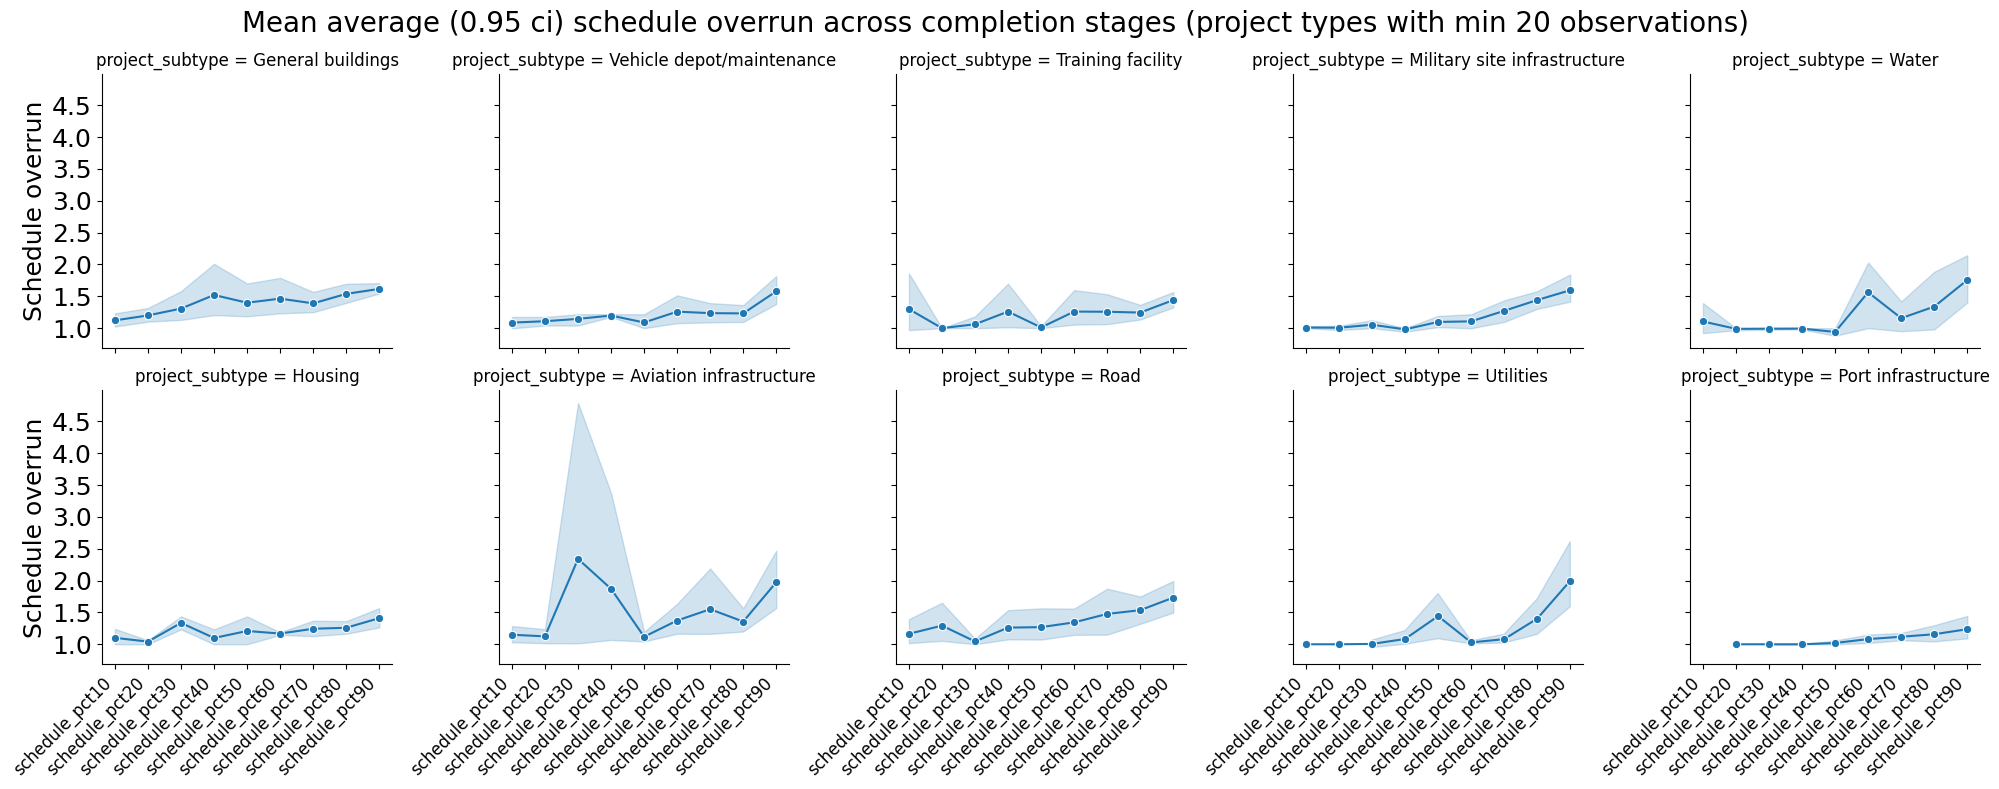

In [376]:
# Schedule overrun facet grid, min 20 projects
plot = sns.FacetGrid(schedule_melted_min20, col="project_subtype", col_wrap=5, height=4, sharey=True)
plot.map(sns.lineplot, "Completion stage", "Schedule overrun", marker="o")
[plt.setp(ax.get_xticklabels(), rotation=45, ha="right", size=12) for ax in plot.axes.flat]
[plt.setp(ax.set_xlabel(""), rotation=45, ha="right", size=12) for ax in plot.axes.flat]
[plt.setp(ax.get_yticklabels(), size=18) for ax in plot.axes.flat]
[plt.setp(ax.set_ylabel("Schedule overrun"), size=18) for ax in plot.axes.flat]

plot.set_titles(size=12)
plot.figure.suptitle("Mean average (0.95 ci) schedule overrun across completion stages (project types with min 20 observations)", size=20)
plt.tight_layout()

plt.savefig("../plots/rollingAveragesSchedule.png", format='png')
plt.show()

/var/folders/z7/sh9lp16n1f997dpqzbly6cfh0000gp/T/ipykernel_2341/2276044323.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels([f"cost_pct{i}" for i in range(10, 100, 10)], rotation=45, ha="right")
/var/folders/z7/sh9lp16n1f997dpqzbly6cfh0000gp/T/ipykernel_2341/2276044323.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels([f"schedule_pct{i}" for i in range(10, 100, 10)], rotation=45, ha="right")


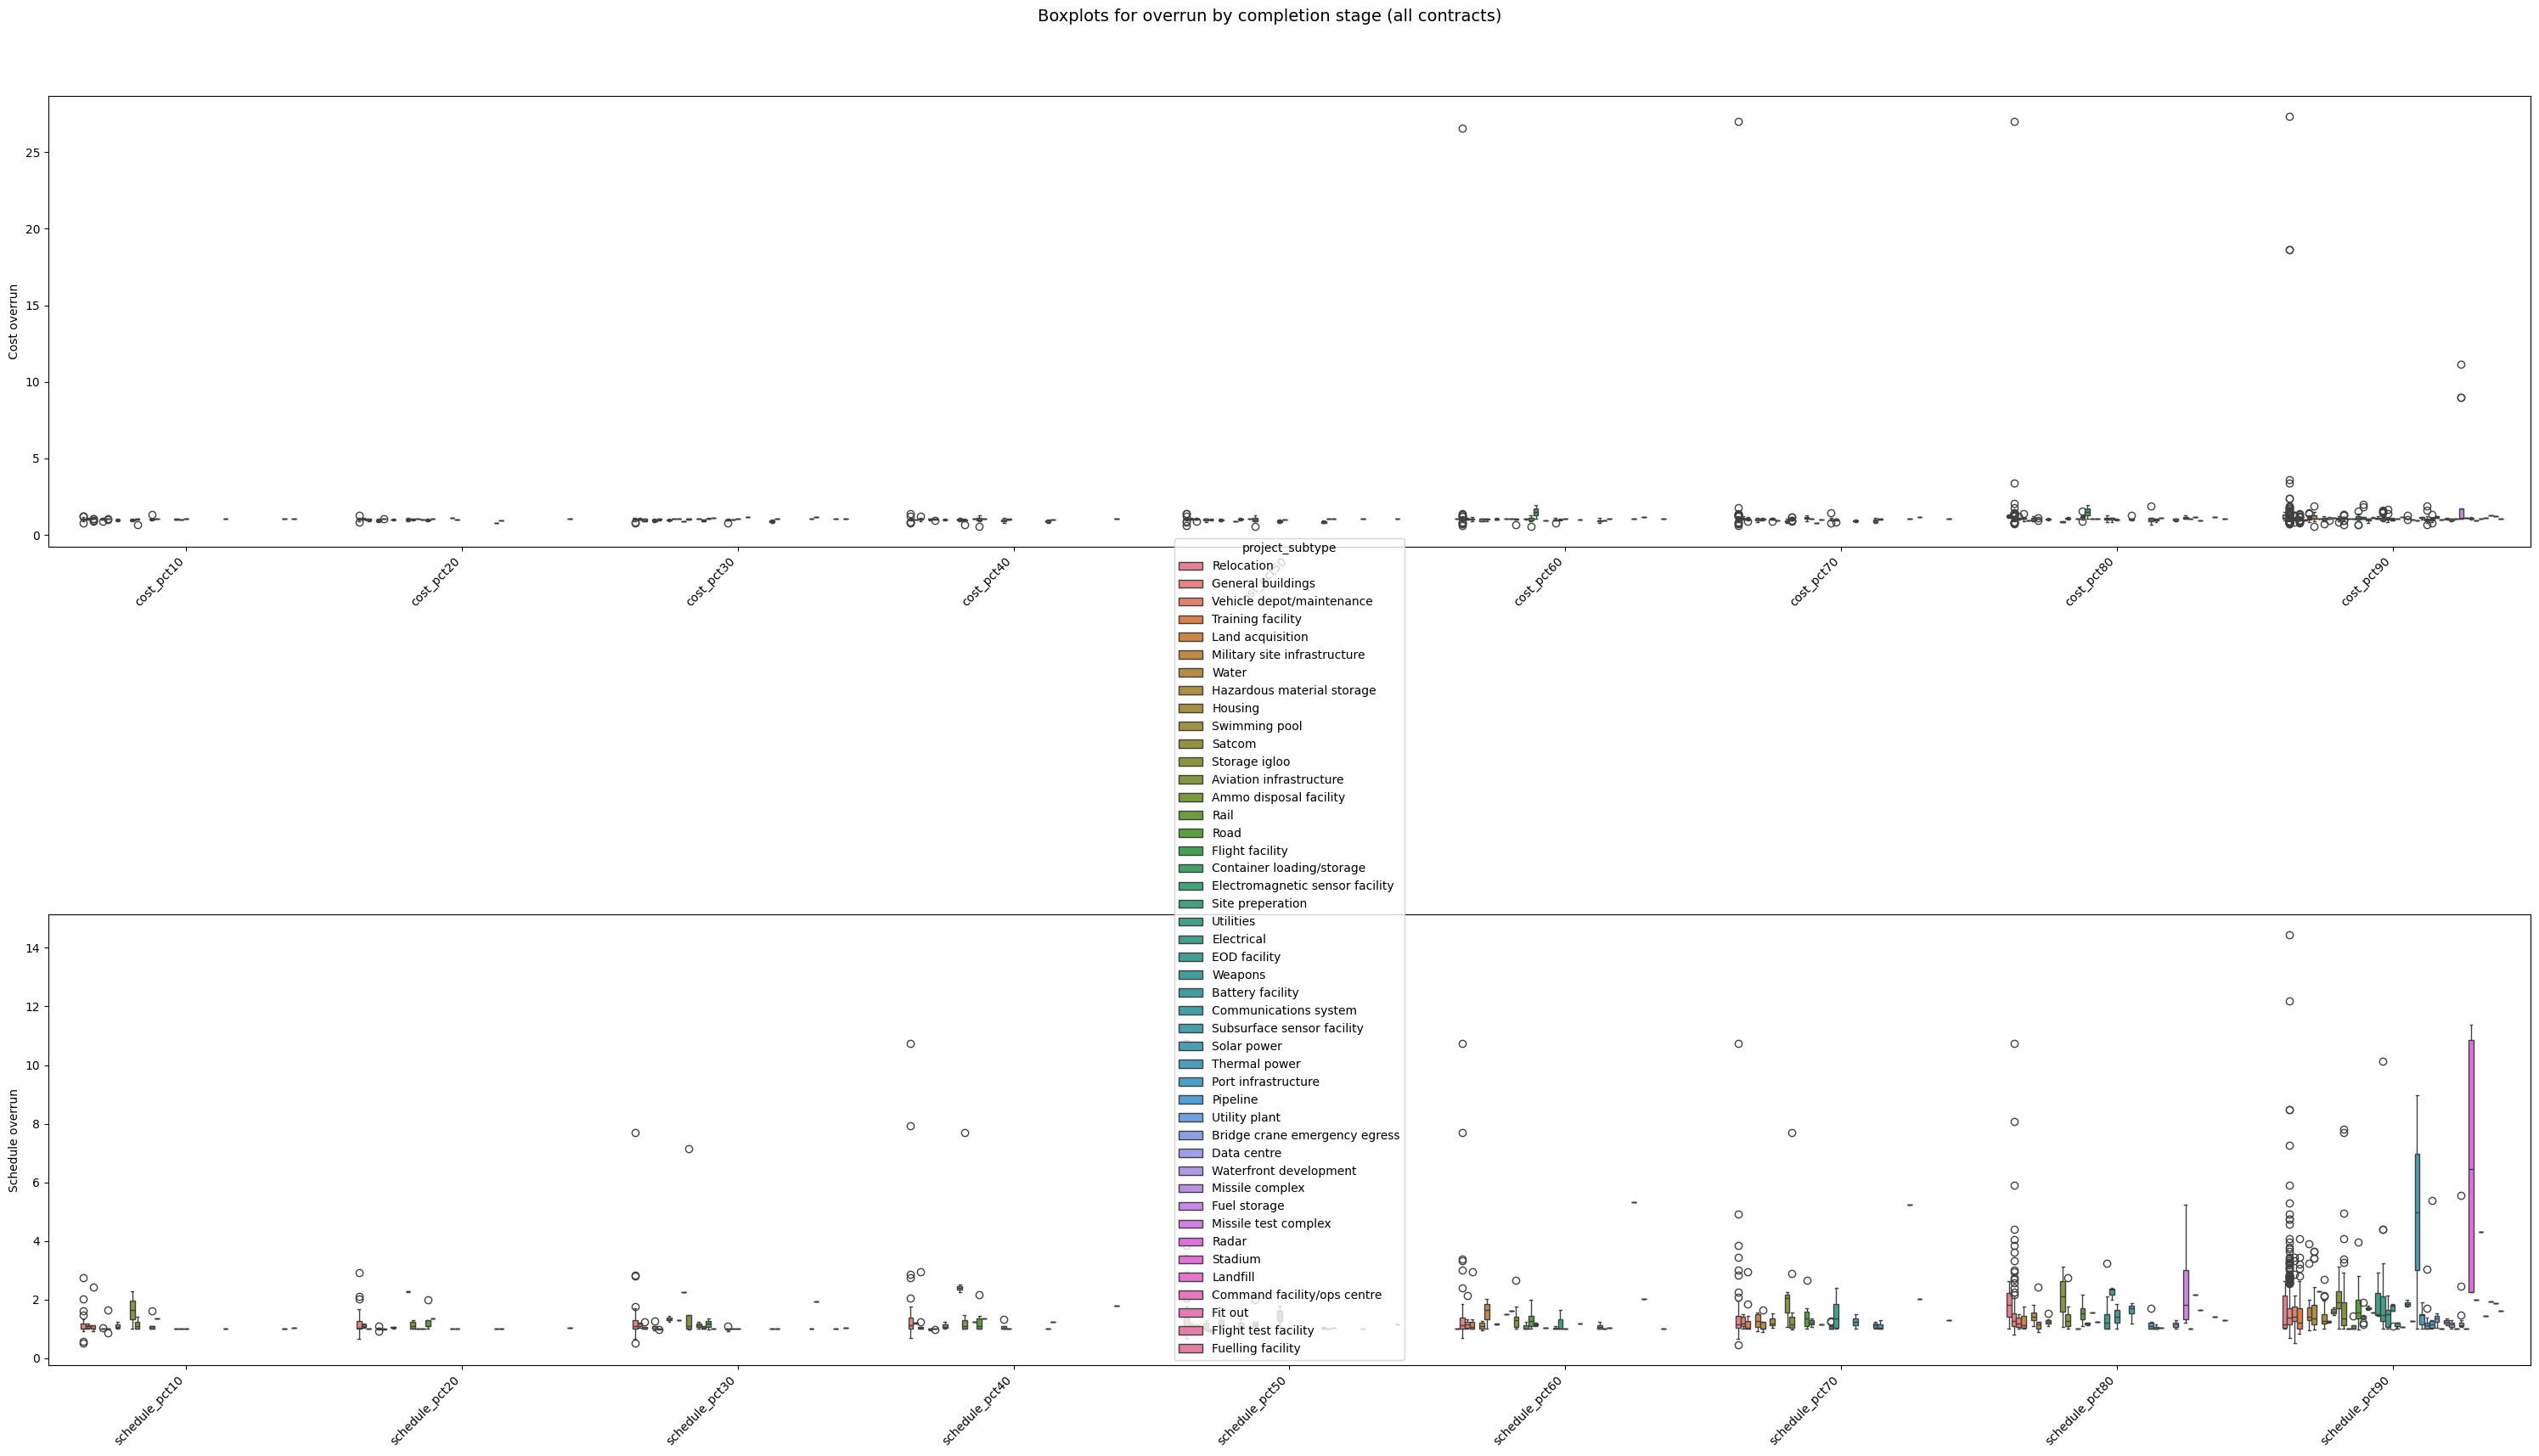

In [377]:
# Overrun boxplots by completion stage and category
fig, axes = plt.subplots(2, 1, figsize=(30, 18))

sns.boxplot(data=cost_melted, x="Completion stage", y="Cost overrun", hue="project_subtype", ax=axes[0])
sns.boxplot(data=schedule_melted, x="Completion stage", y="Schedule overrun", hue="project_subtype", ax=axes[1])

axes[0].set_xticklabels([f"cost_pct{i}" for i in range(10, 100, 10)], rotation=45, ha="right")
axes[1].set_xticklabels([f"schedule_pct{i}" for i in range(10, 100, 10)], rotation=45, ha="right")

axes[0].set_xlabel("")
axes[1].set_xlabel("")

axes[0].set_ylabel("Cost overrun")
axes[1].set_ylabel("Schedule overrun")

axes[0].get_legend().remove()

fig.suptitle("Boxplots for overrun by completion stage (all contracts)", size=14)
fig.tight_layout(rect=[0, 0.03, 1, 0.95])

/var/folders/z7/sh9lp16n1f997dpqzbly6cfh0000gp/T/ipykernel_2341/1643842810.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels([f"cost_pct{i}" for i in range(10, 100, 10)], rotation=45, ha="right")
/var/folders/z7/sh9lp16n1f997dpqzbly6cfh0000gp/T/ipykernel_2341/1643842810.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels([f"schedule_pct{i}" for i in range(10, 100, 10)], rotation=45, ha="right")


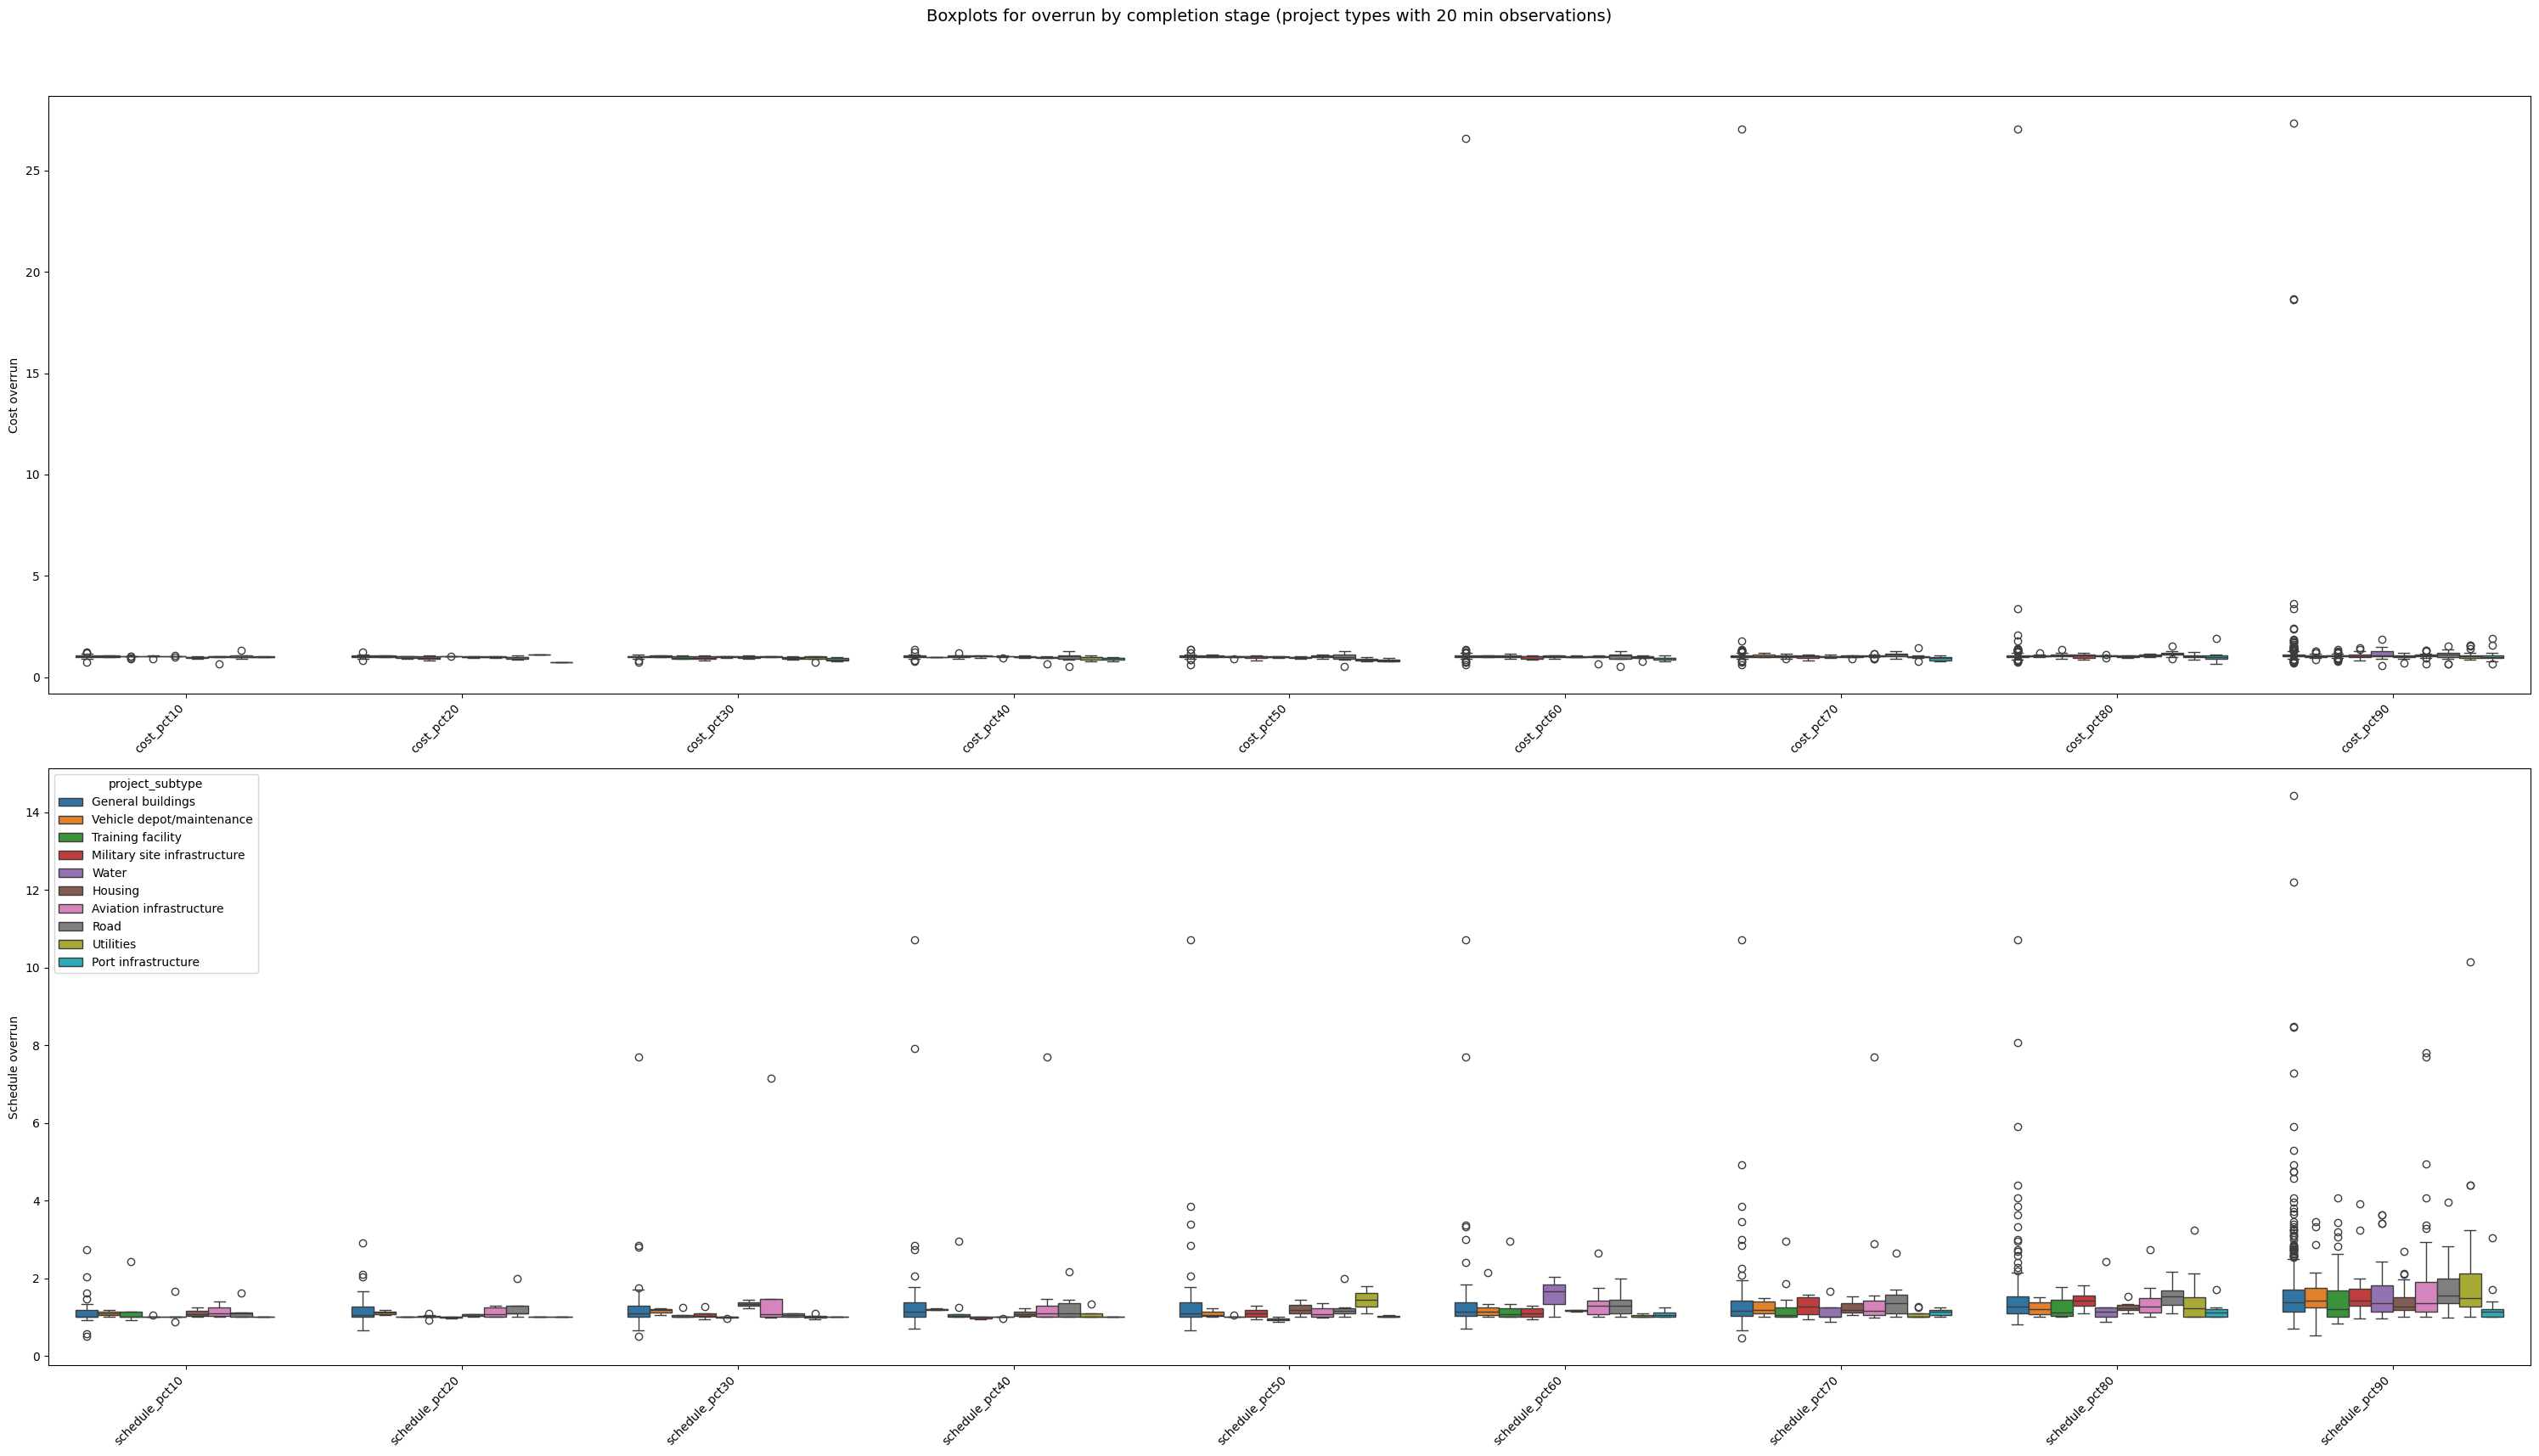

In [378]:
# Overrun boxplots by completion stage and category, min observation = 20
fig, axes = plt.subplots(2, 1, figsize=(30, 18))

sns.boxplot(data=cost_melted_min20, x="Completion stage", y="Cost overrun", hue="project_subtype", ax=axes[0])
sns.boxplot(data=schedule_melted_min20, x="Completion stage", y="Schedule overrun", hue="project_subtype", ax=axes[1])

axes[0].set_xticklabels([f"cost_pct{i}" for i in range(10, 100, 10)], rotation=45, ha="right")
axes[1].set_xticklabels([f"schedule_pct{i}" for i in range(10, 100, 10)], rotation=45, ha="right")

axes[0].set_xlabel("")
axes[1].set_xlabel("")

axes[0].set_ylabel("Cost overrun")
axes[1].set_ylabel("Schedule overrun")

axes[0].get_legend().remove()

fig.suptitle("Boxplots for overrun by completion stage (project types with 20 min observations)", size=14)
fig.tight_layout(rect=[0, 0.03, 1, 0.95])

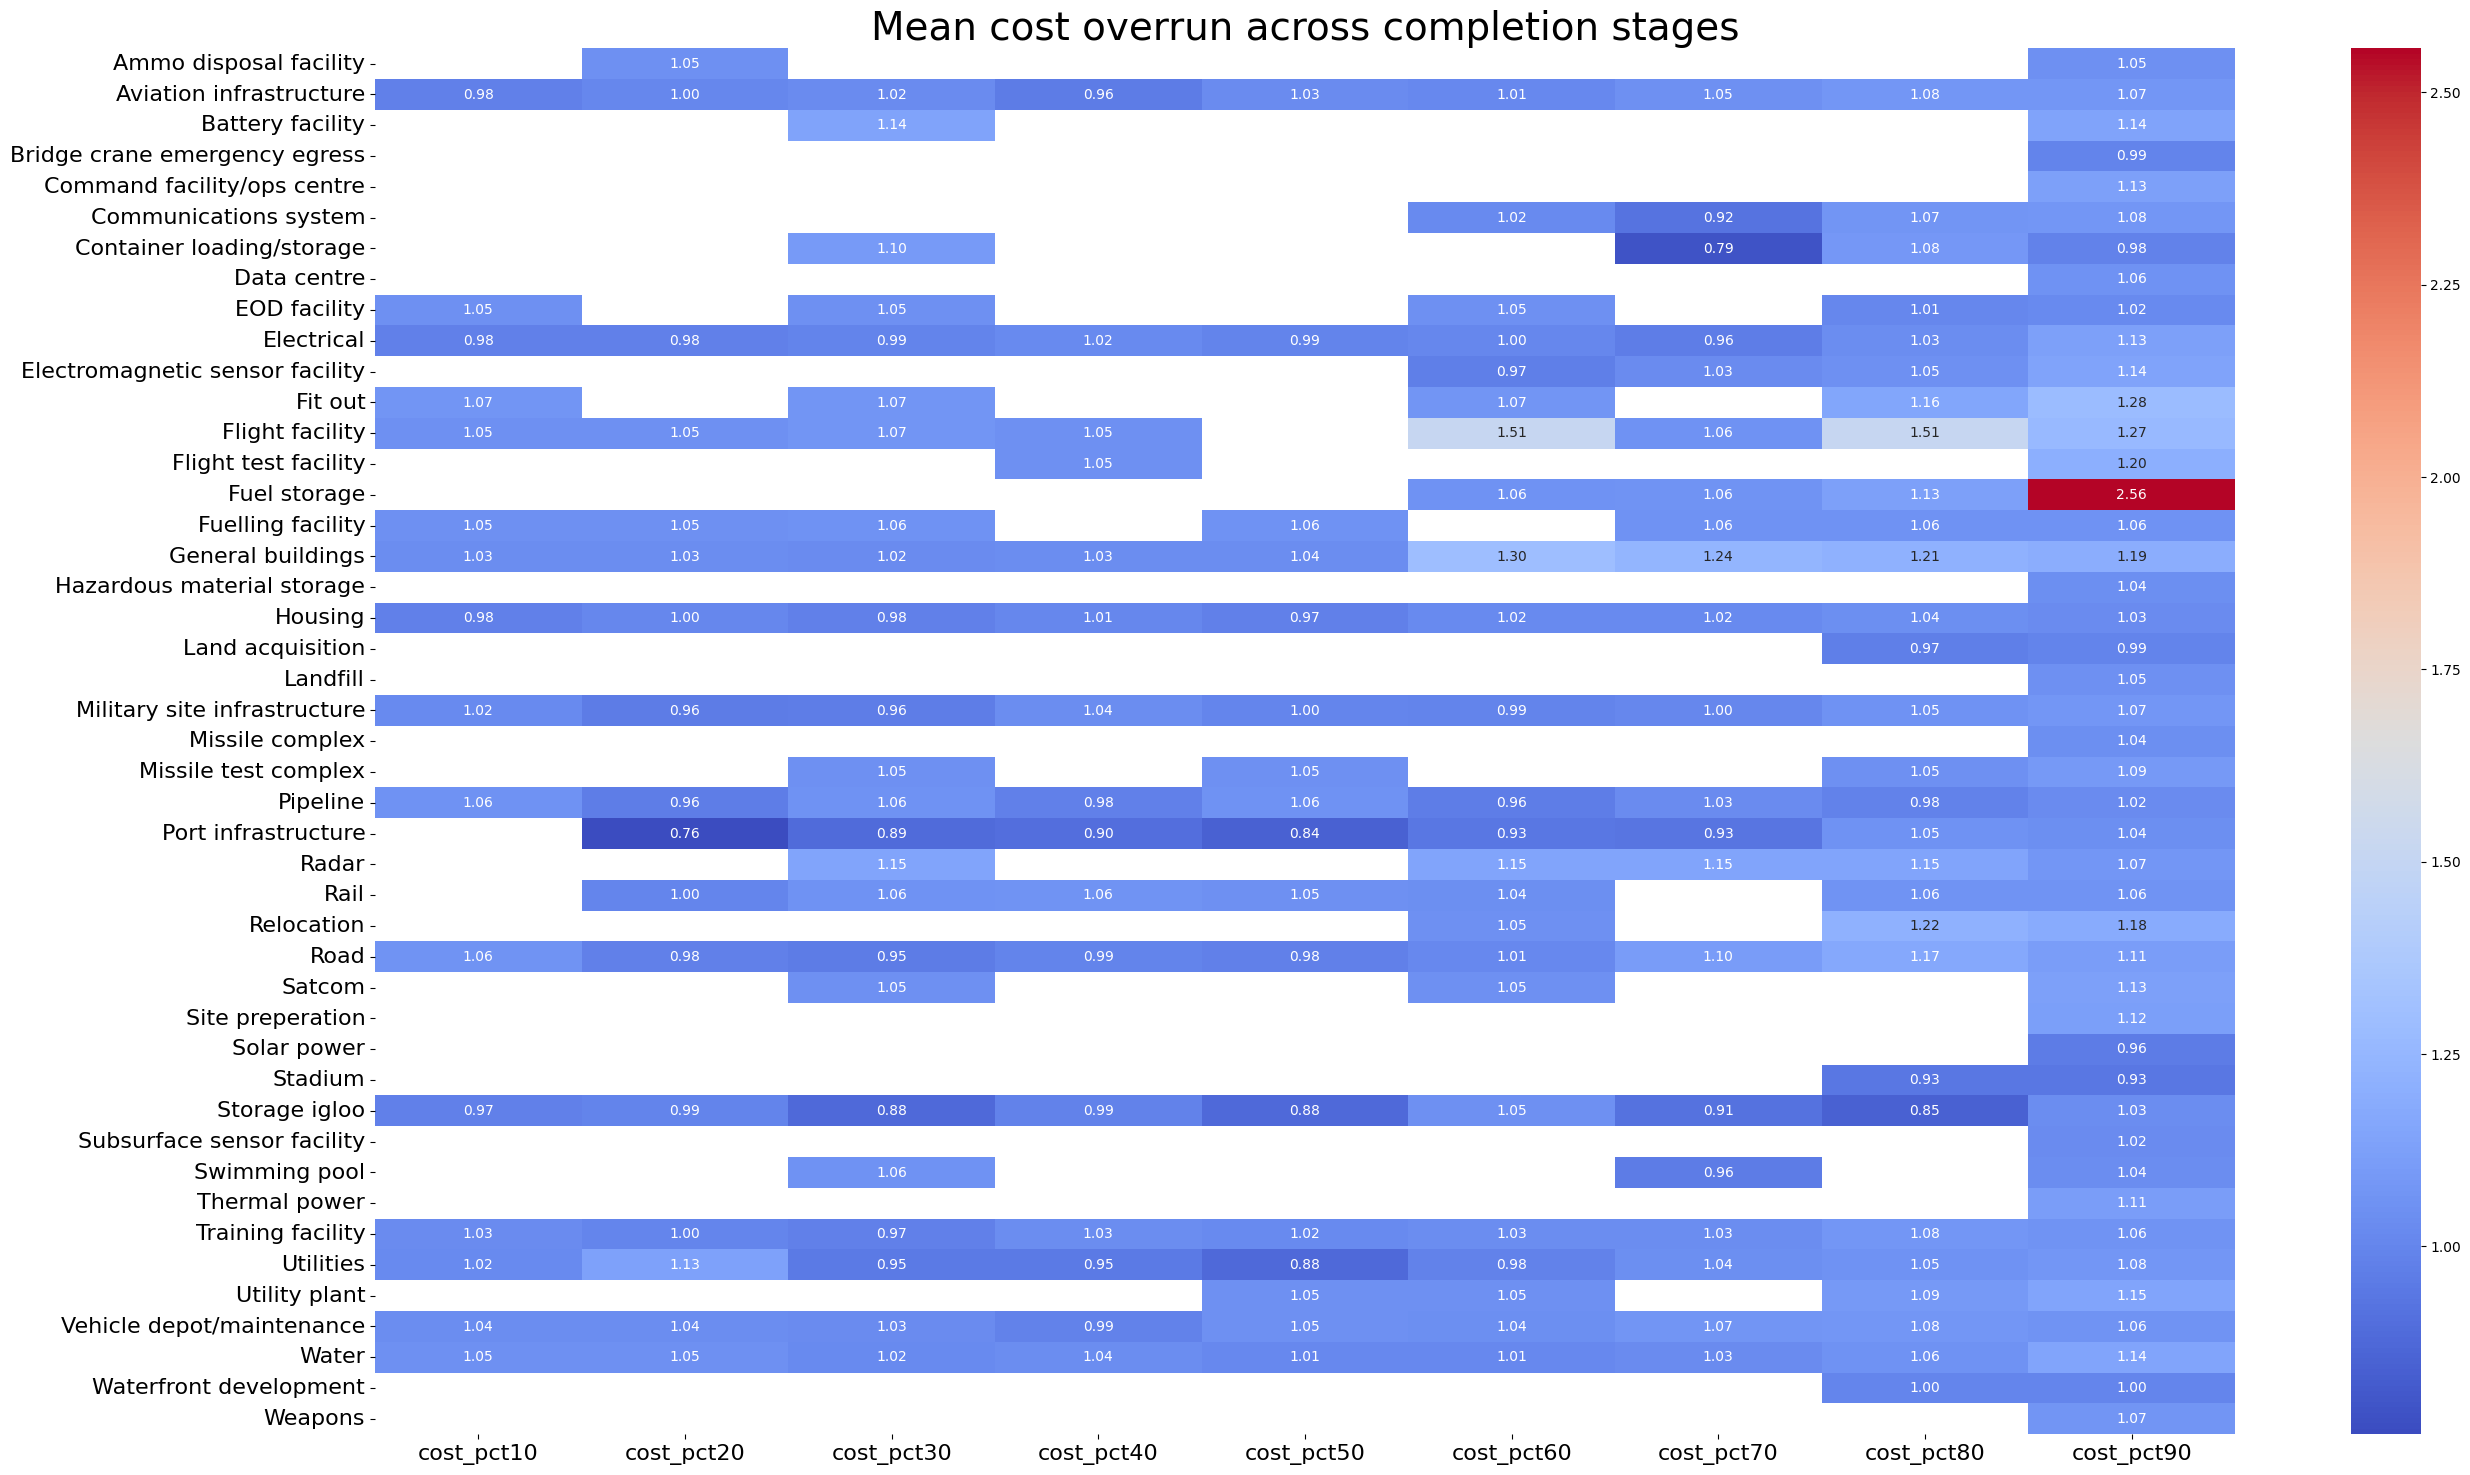

In [379]:
# Heatmap highlighting cost overruns at completion stages by category

cost_pivot = cost_melted.pivot_table(index="project_subtype", columns="Completion stage", values="Cost overrun", aggfunc="mean")

plt.figure(figsize=(30, 18))
sns.heatmap(cost_pivot, cmap="coolwarm", annot=True, fmt=".2f")
plt.title("Mean cost overrun across completion stages", size=28)
plt.tick_params(axis='both', labelsize=16)

plt.xlabel("")
plt.ylabel("")

plt.savefig("../plots/heatmapCost.png")
plt.show()

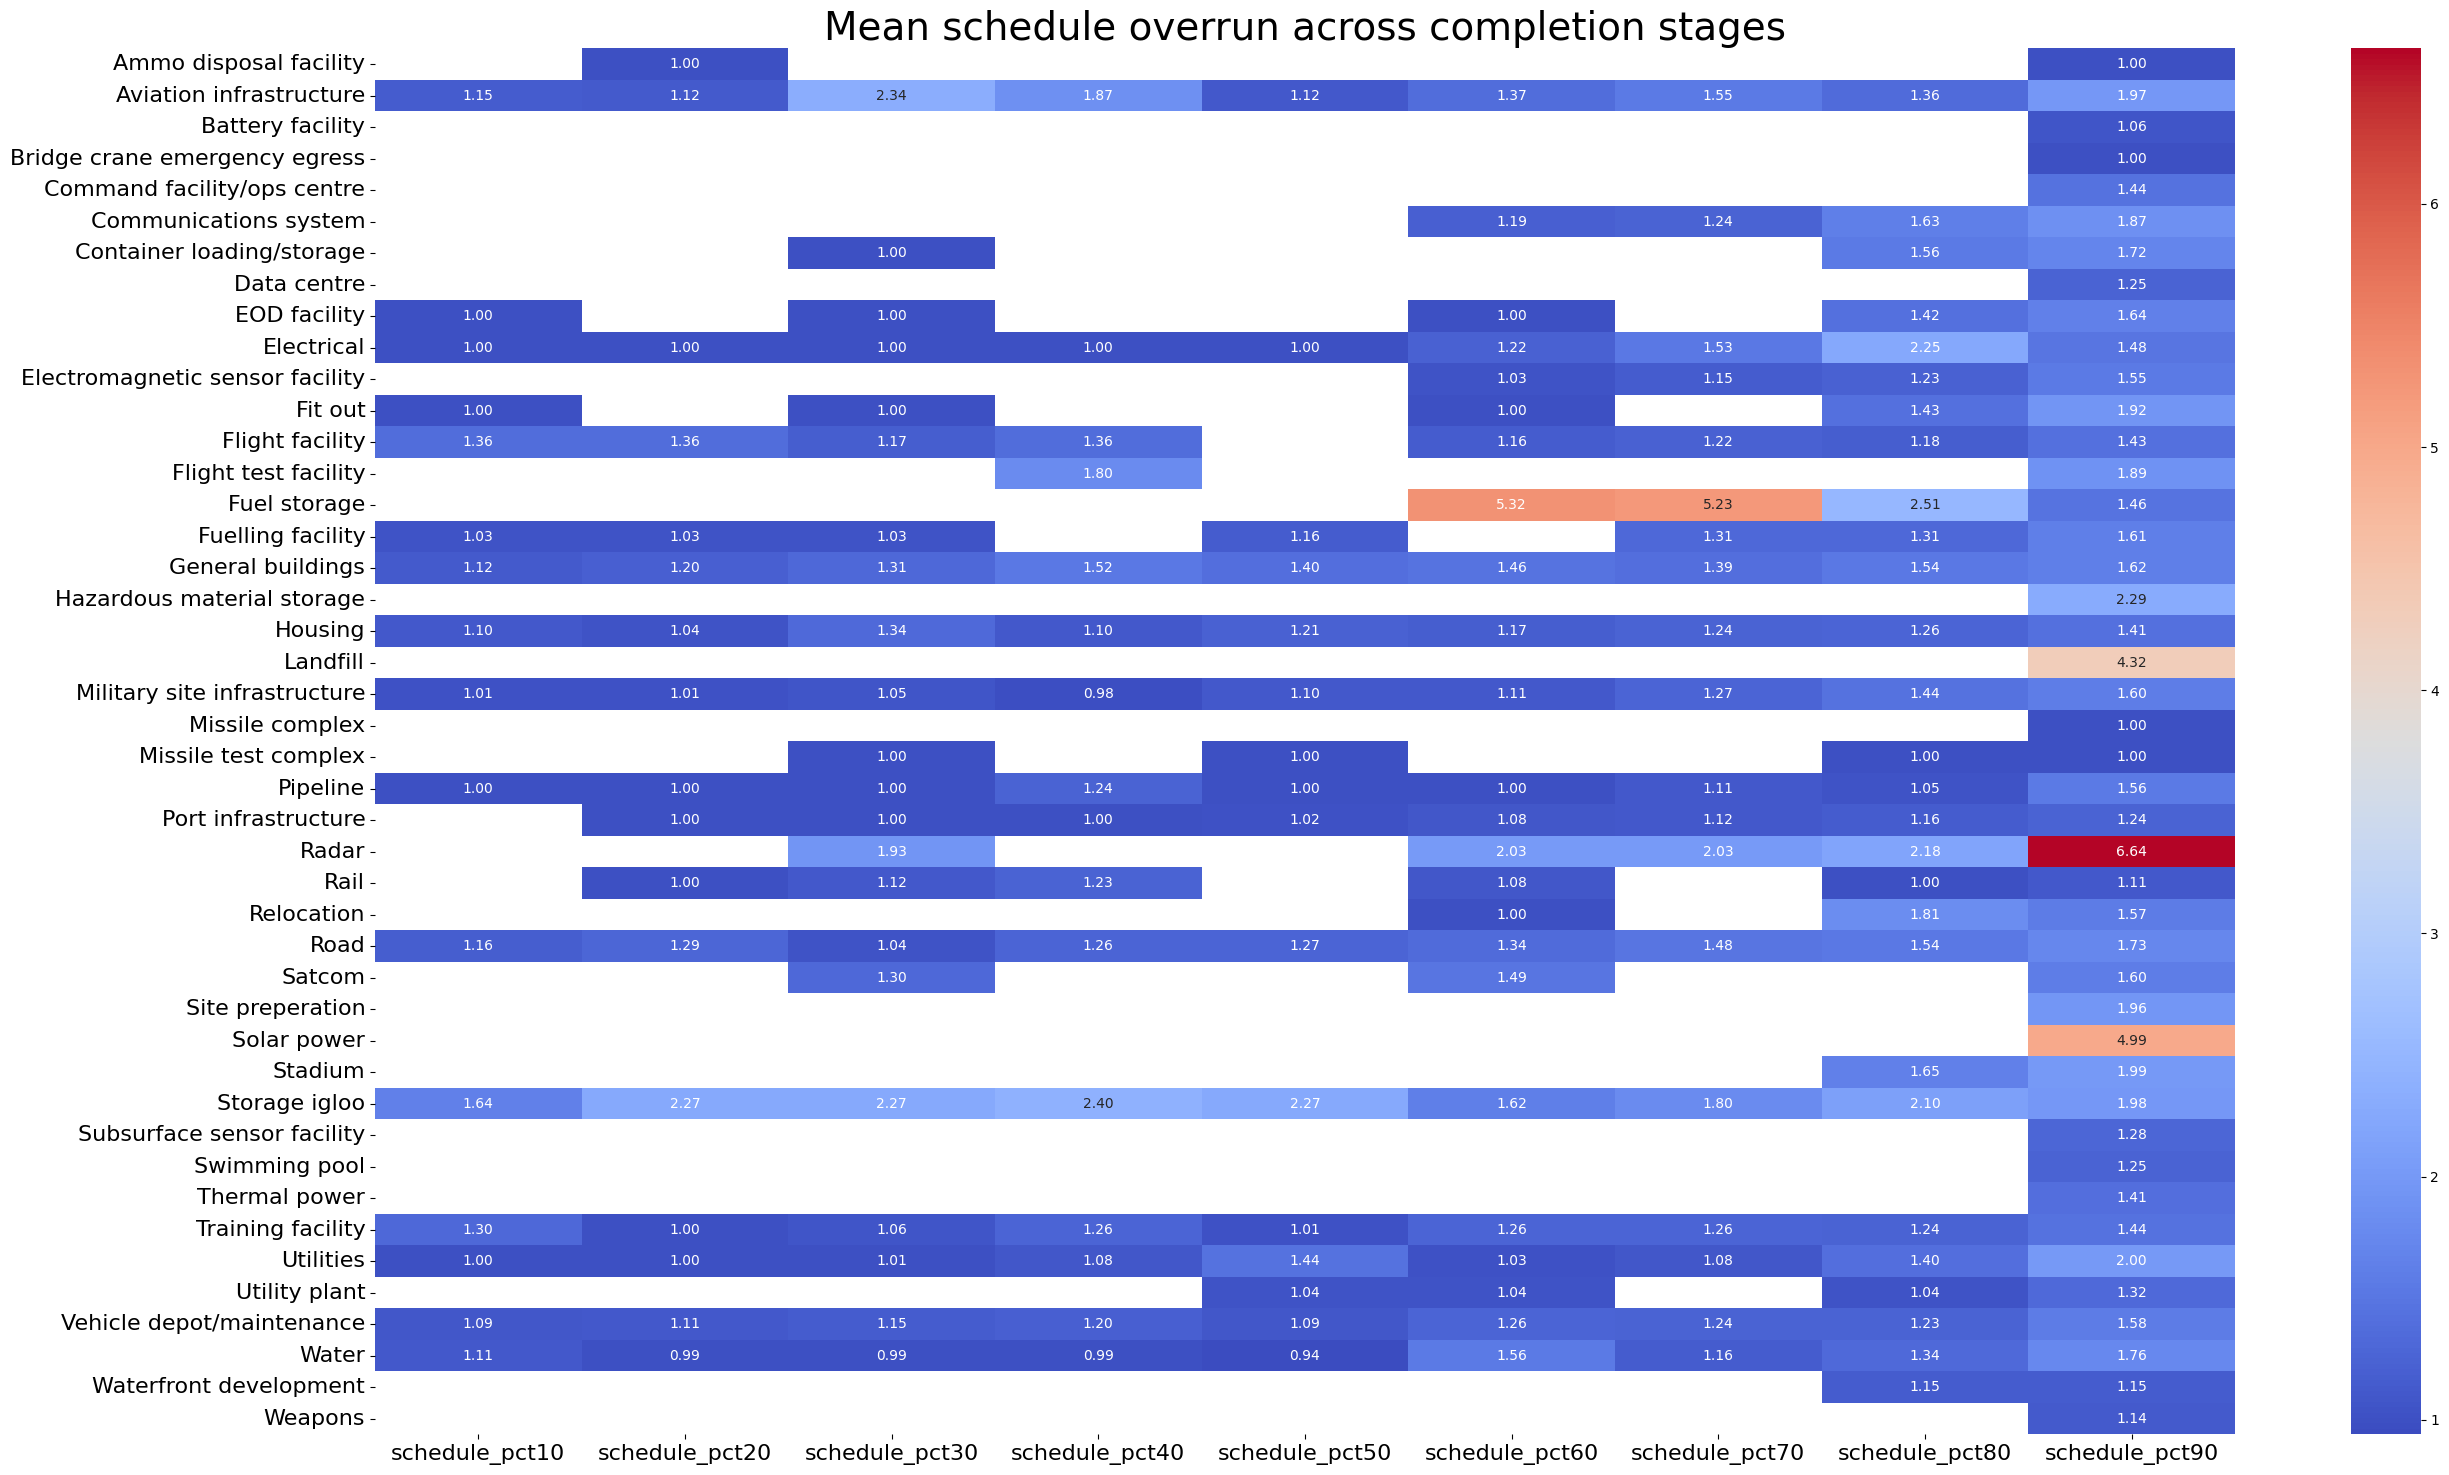

In [381]:
# Heatmap highlighting schedule overruns at completion stages by category

schedule_pivot = schedule_melted.pivot_table(index="project_subtype", columns="Completion stage", values="Schedule overrun", aggfunc="mean")

plt.figure(figsize=(30, 18))
sns.heatmap(schedule_pivot, cmap="coolwarm", annot=True, fmt=".2f")
plt.title("Mean schedule overrun across completion stages", size=28)
plt.tick_params(axis='both', labelsize=16)

plt.xlabel("")
plt.ylabel("")

plt.savefig("../plots/heatmapSchedule.png")
plt.show()